<a href="https://colab.research.google.com/github/ramirezzzluisss/pythonprojects/blob/main/HonorsThesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Honors Thesis Data Analysis
## Utah DOPL Contractor Credit Qualtrics Survey

In [239]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from numpy import loadtxt

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LinearRegression

from xgboost import XGBClassifier
from xgboost import plot_tree

import statsmodels.api as sm
from scipy import stats
import textwrap
from itertools import product
from six import StringIO
from IPython.display import Image  
import pydotplus


In [240]:
# connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [241]:
# connect to csv data file

from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/UtahContractorSurvey202304251550.csv')

Mounted at /content/gdrive


In [242]:
# preview number of rows and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   StartDate              2656 non-null   object
 1   EndDate                2656 non-null   object
 2   Status                 2656 non-null   object
 3   IPAddress              2648 non-null   object
 4   Progress               2656 non-null   object
 5   Duration (in seconds)  2656 non-null   object
 6   Finished               2656 non-null   object
 7   RecordedDate           2656 non-null   object
 8   ResponseId             2656 non-null   object
 9   RecipientLastName      2 non-null      object
 10  RecipientFirstName     2 non-null      object
 11  RecipientEmail         2 non-null      object
 12  ExternalReference      2 non-null      object
 13  LocationLatitude       1987 non-null   object
 14  LocationLongitude      1987 non-null   object
 15  DistributionChannel  

In [243]:
df.head(15)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q2,Q3,Q4,Q5,Q23,Q23_7_TEXT,Q24,Q25,Q26,Q27,Q28,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q21_8_TEXT,Q22,Q29
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,What is the classification of your contractor ...,What type of business entity is registered und...,Are 50 percent or more of your shareholders Hi...,What is your age?,What is your race/ethncity - Selected Choice,What is your race/ethncity - Other - Text,What is your gender?,What is your highest level of education?,What is your credit score?,Are you a homeowner?,Was English your first language?,How many years have you been a licensed contra...,"Do you focus more on Residential, Commercial, ...",Have you worked on Leadership in Energy and En...,Do you have a written business plan?,What did you use to obtain an Employer Identif...,How many employees do you employ?,What percent of your employees are Hispanic or...,"In the last year, how many of your employees m...",Has your business been approved for a loan by ...,Has your business been approved for a loan thr...,Has your business been approved for a business...,How would you rate your relationship with your...,Is your accountant or tax preparer a Certified...,How much revenue/sales did your business make ...,What is your business's total outstanding busi...,What is the top source of financing for your b...,What is the top source of financing for your b...,Which of the following Utah consulting service...,Enter your phone number if you are interested ...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}","{""ImportId"":""recipientFirstName""}","{""ImportId"":""recipientEmail""}","{""ImportId"":""externalDataReference""}","{""ImportId"":""locationLatitude""}","{""ImportId"":""locationLongitude""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}","{""ImportId"":""QID2""}","{""ImportId"":""QID29""}","{""ImportId"":""QID3""}","{""ImportId"":""QID4""}","{""ImportId"":""QID22""}","{""ImportId"":""QID22_7_TEXT""}","{""ImportId"":""QID23""}","{""ImportId"":""QID24""}","{""ImportId"":""QID25""}","{""ImportId"":""QID26""}","{""ImportId"":""QID27""}","{""ImportId"":""QID5""}","{""ImportId"":""QID6""}","{""ImportId"":""QID7""}","{""ImportId"":""QID8""}","{""ImportId"":""QID9""}","{""ImportId"":""QID10""}","{""ImportId"":""QID11""}","{""ImportId"":""QID12""}","{""ImportId"":""QID13""}","{""ImportId"":""QID14""}","{""ImportId"":""QID15""}","{""ImportId"":""QID16""}","{""ImportId"":""QID17""}","{""ImportId"":""QID18""}","{""ImportId"":""QID19""}","{""ImportId"":""QID20""}","{""ImportId"":""QID20_8_TEXT""}","{""ImportId"":""QID21""}","{""ImportId"":""QID28_TEXT""}"
2,2023-02-13 15:10:50,2023-02-13 15:12:01,Survey Preview,NaN,100,70,True,2023-02-13 15:12:01,R_1lidpbGA9ypeT2L,NaN,NaN,NaN,NaN,40.6982,-111.841,preview,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-02-16 21:46:47,2023-02-16 21:50:44,Survey Preview,NaN,100,236,True,2023-02-16 21:50:45,R_1CHhLtsrT1hBKQ4,NaN,NaN,NaN,NaN,40.761,-111.8611,preview,EN,NaN,NaN,I DO NOT know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual Taxpayer Identification Number (ITIN),NaN,NaN

In [244]:
# clean data
df.rename(columns = {'Q2':'LicenseClassification',
                     'Q3':'EntityType',
                     'Q4':'LatinxOwned',
                     'Q5':'Age',
                     'Q6':'YearsofExperience',
                     'Q7':'ConstructionFocus',
                     'Q8':'LEED',
                     'Q9':'BusinessPlan',
                     'Q10':'EINApplication',
                     'Q11':'NumOfEmployees',
                     'Q12':'LatinxEmployeesPercent',
                     'Q13':'WorkAccidents',
                     'Q14':'SBALoan',
                     'Q15':'PPPLoan',
                     'Q16':'BankCreditUnionLoan',
                     'Q17':'LoanOfficerRelationship',
                     'Q18':'AccountantCPA',
                     'Q19':'Revenue2022',
                     'Q20':'TotalOutstandingDebt',
                     'Q21':'TopFinancingSource',
                     'Q22':'ConsultingServices',
                     'Q23':'RaceAndEthnicity',
                     'Q24':'Gender',
                     'Q25':'Education',
                     'Q26':'CreditScore',
                     'Q27':'HomeOwner',
                     'Q28':'EnglishLanguage',
                     'Q29':'PhoneNumber',
                     }, inplace = True)

# delete first 8 rows
df_clean = df.iloc[8:]

# drop null rows for race and ethnicity because we are interested
# in analyzing differences in this demographic category
df_clean = df_clean.dropna(axis=0, subset=['RaceAndEthnicity'])

# filter out contractors that are retired
df_clean = df_clean[(df_clean['EntityType'] != 'I am RETIRED')]

# view columns, row count, and datatypes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 8 to 2655
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   StartDate                1974 non-null   object
 1   EndDate                  1974 non-null   object
 2   Status                   1974 non-null   object
 3   IPAddress                1974 non-null   object
 4   Progress                 1974 non-null   object
 5   Duration (in seconds)    1974 non-null   object
 6   Finished                 1974 non-null   object
 7   RecordedDate             1974 non-null   object
 8   ResponseId               1974 non-null   object
 9   RecipientLastName        0 non-null      object
 10  RecipientFirstName       0 non-null      object
 11  RecipientEmail           0 non-null      object
 12  ExternalReference        0 non-null      object
 13  LocationLatitude         1963 non-null   object
 14  LocationLongitude        1963 non-null  

In [245]:
SurveyResponseRate = 1974/27290

print(SurveyResponseRate)

0.07233418834738


# Data Visualisation and Descriptive Statistics

In [246]:
# this is used to wrap the x labels for the bar graphs
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [247]:
df_clean['RaceAndEthnicity'] = pd.Categorical(df_clean['RaceAndEthnicity'],
                                         categories = ['White', 'Hispanic or Latino/a/x', 'Black or African American', 'Asian',
                                                       'Native Hawaiian or Pacific Islander', 'American Indian or Alaska Native', 'Other'],
                                         ordered = True)

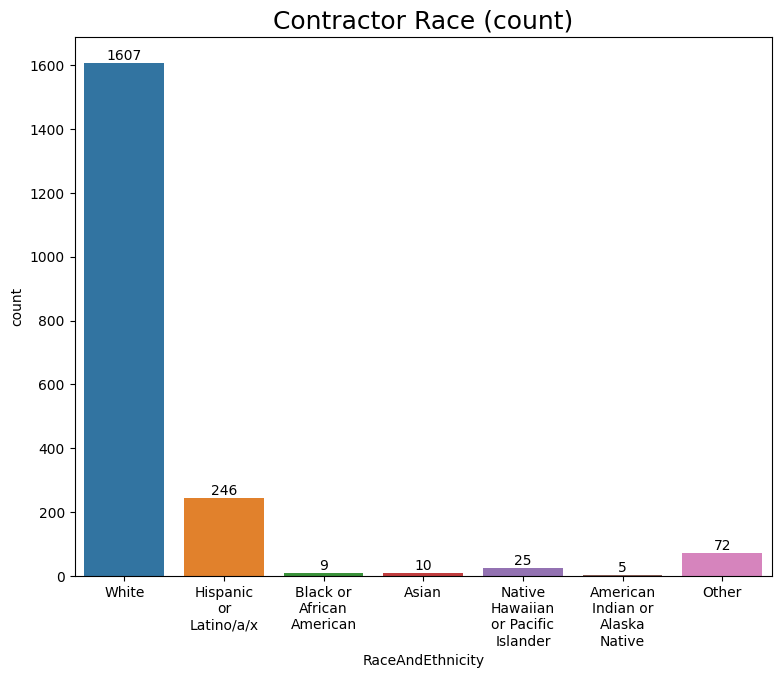

In [248]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('Contractor Race (count)', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

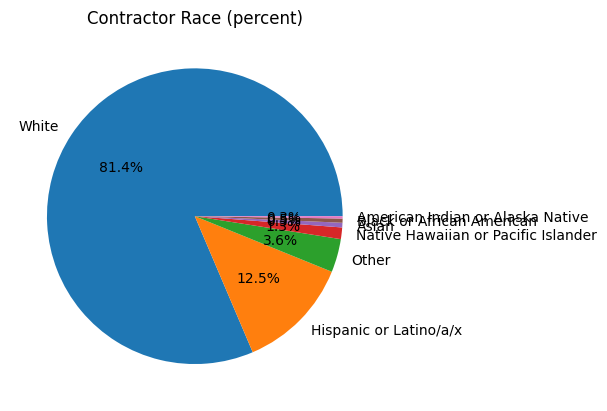

In [250]:
new_df = df_clean.groupby('RaceAndEthnicity').count()
new_df = new_df.sort_values(by='Finished',ascending=False)

new_df.plot(y='Finished',kind='pie',autopct='%1.1f%%')

plt.title("Contractor Race (percent)")

ax = plt.gca() 
ax.autopct='%1.1f%%'
ax.set_ylabel('')
ax.get_legend().remove()

plt.show()

latinxEntrep = 12.5
whiteEntrep = 81.4

In [251]:
df_clean['Revenue2022'].unique()
df_clean['Revenue2022'] = pd.Categorical(df_clean['Revenue2022'],
                                         categories = ['$0', '$25k or less', '$25k - $100k', '$100k - $250k', '$250k - $1M', 'More than $1M'],
                                         ordered = True)

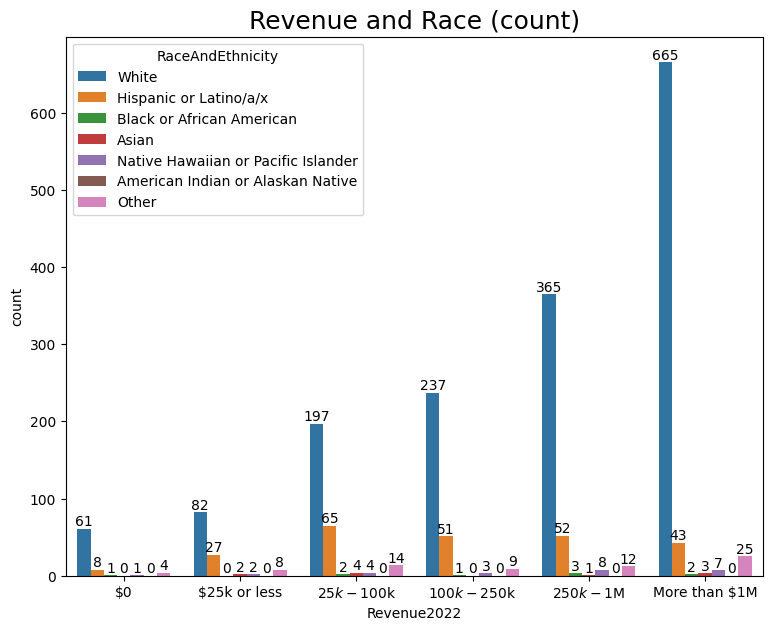

In [252]:
plt.figure(figsize=(9,7))
hue_order = ['White', 'Hispanic or Latino/a/x', 'Black or African American', 'Asian',
             'Native Hawaiian or Pacific Islander', 'American Indian or Alaskan Native',
             'Other']

ax = sns.countplot(x = 'Revenue2022', hue = 'RaceAndEthnicity', hue_order = hue_order, data = df_clean)
#Add title
plt.title('Revenue and Race (count)', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

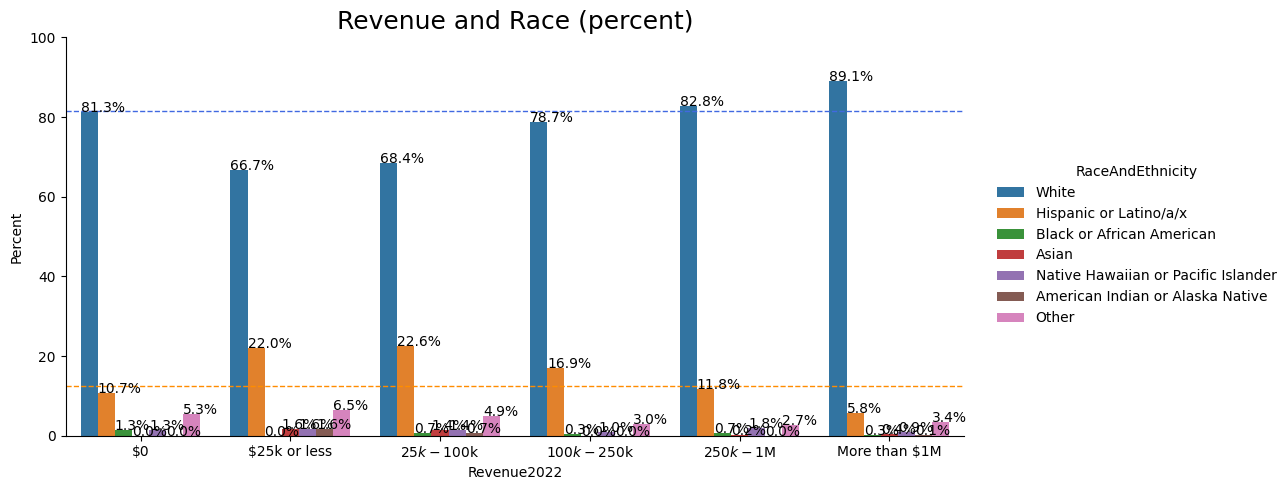

In [253]:
# convert to percentages
new_df = df_clean.groupby('Revenue2022')['RaceAndEthnicity'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='Revenue2022', y='Percent', hue='RaceAndEthnicity', kind='bar', data=new_df, height=5, aspect = 2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('Revenue and Race (percent)', fontsize=18)

# this is to set the reference on how Latinx make up 15% of population in Utah
g.map(plt.axhline, y=latinxEntrep, ls='--', color='darkorange', linewidth=1)
g.map(plt.axhline, y=whiteEntrep, ls='--', color='royalblue', linewidth=1)

In [254]:
df_clean['BankCreditUnionLoan'] = pd.Categorical(df_clean['BankCreditUnionLoan'],
                                         categories = ['Approved', 'Did not apply', 'Denied', 'Do not qualify'],
                                         ordered = True)

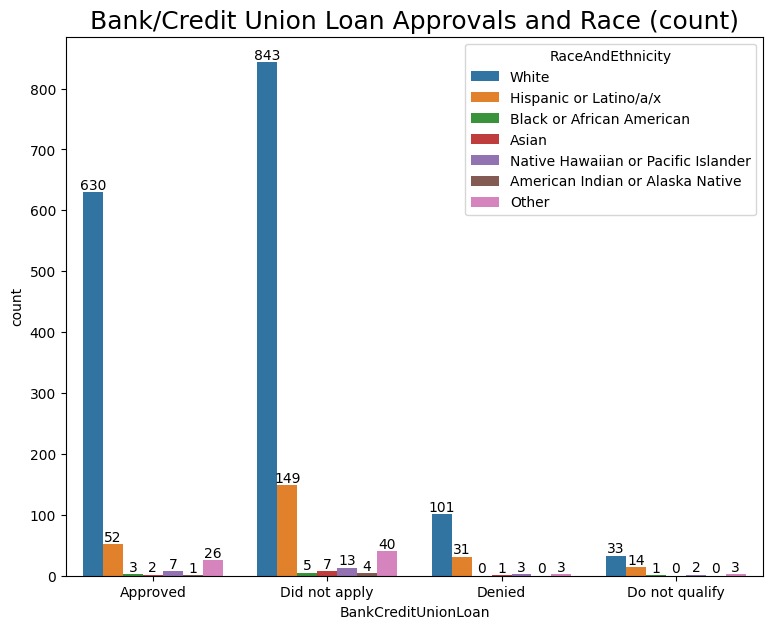

In [255]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'BankCreditUnionLoan', hue = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('Bank/Credit Union Loan Approvals and Race (count)', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

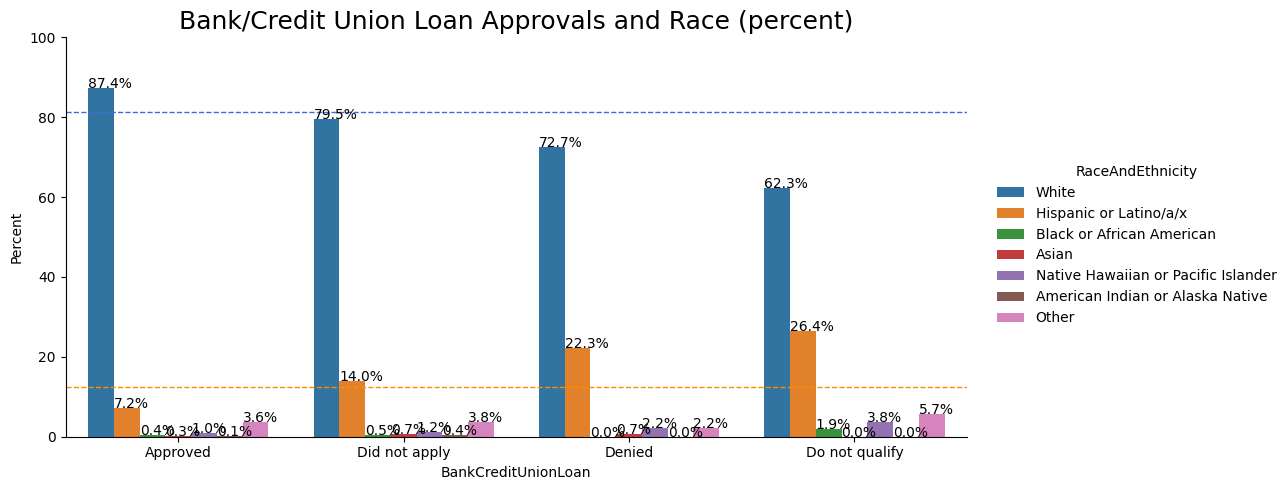

In [256]:
# convert to percentages
new_df = df_clean.groupby('BankCreditUnionLoan')['RaceAndEthnicity'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='BankCreditUnionLoan', y='Percent', hue='RaceAndEthnicity', kind='bar', data=new_df, height=5, aspect = 2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('Bank/Credit Union Loan Approvals and Race (percent)', fontsize=18)

# this is to set the reference on how Latinx make up 15% of population in Utah
g.map(plt.axhline, y=latinxEntrep, ls='--', color='darkorange', linewidth=1)
g.map(plt.axhline, y=whiteEntrep, ls='--', color='royalblue', linewidth=1)

In [257]:
df_clean['SBALoan'] = pd.Categorical(df_clean['SBALoan'],
                                         categories = ['Approved', 'Did not apply', 'Denied', 'Do not qualify'],
                                         ordered = True)

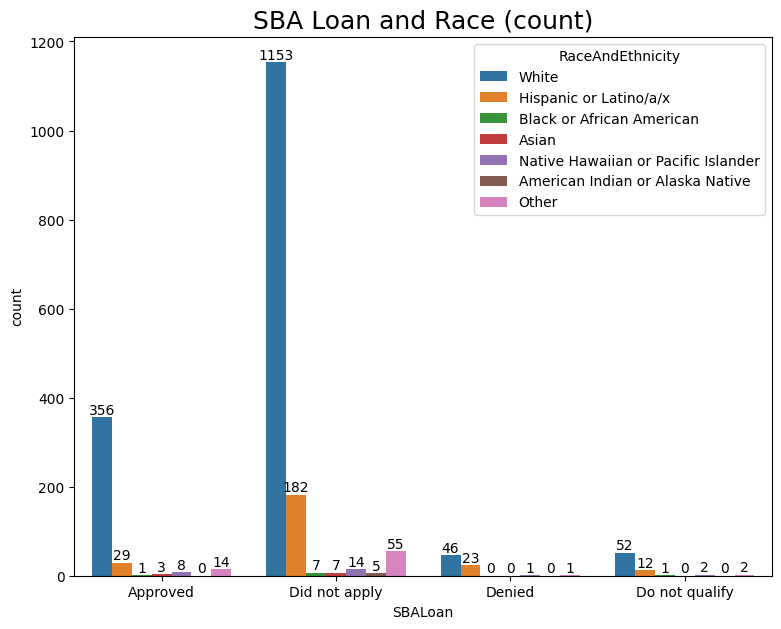

In [258]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'SBALoan', hue = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('SBA Loan and Race (count)', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

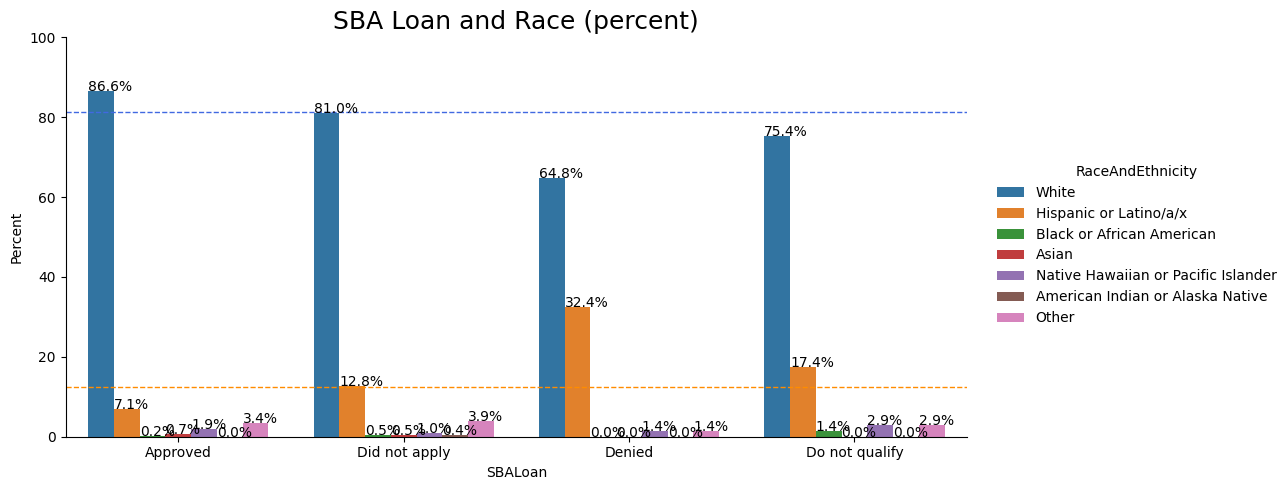

In [259]:
# convert to percentages
new_df = df_clean.groupby('SBALoan')['RaceAndEthnicity'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='SBALoan', y='Percent', hue='RaceAndEthnicity', kind='bar', data=new_df, height=5, aspect = 2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('SBA Loan and Race (percent)', fontsize=18)
# this is to set the reference on how Latinx make up 15% of population in Utah
g.map(plt.axhline, y=latinxEntrep, ls='--', color='darkorange', linewidth=1)
g.map(plt.axhline, y=whiteEntrep, ls='--', color='royalblue', linewidth=1)

In [260]:
df_clean['PPPLoan'] = pd.Categorical(df_clean['PPPLoan'],
                                         categories = ['Approved', 'Did not apply', 'Denied', 'Do not qualify'],
                                         ordered = True)

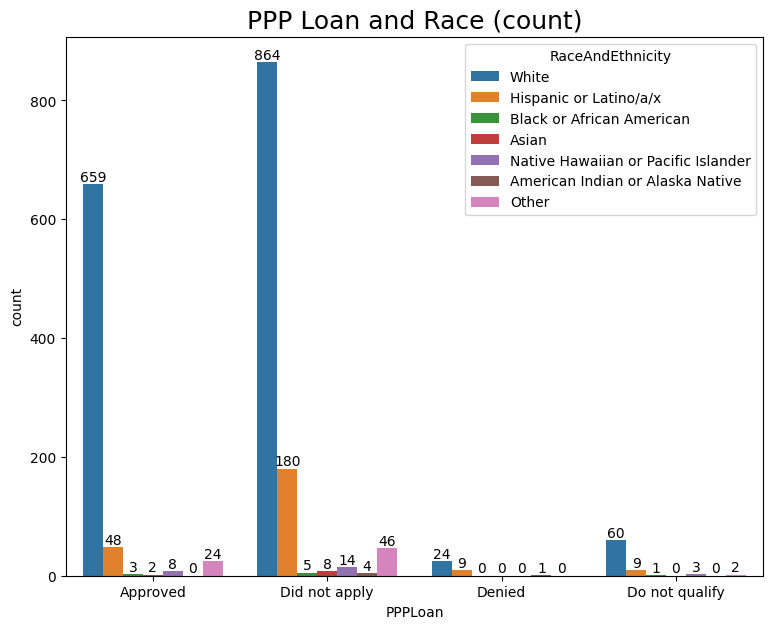

In [261]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'PPPLoan', hue = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('PPP Loan and Race (count)', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

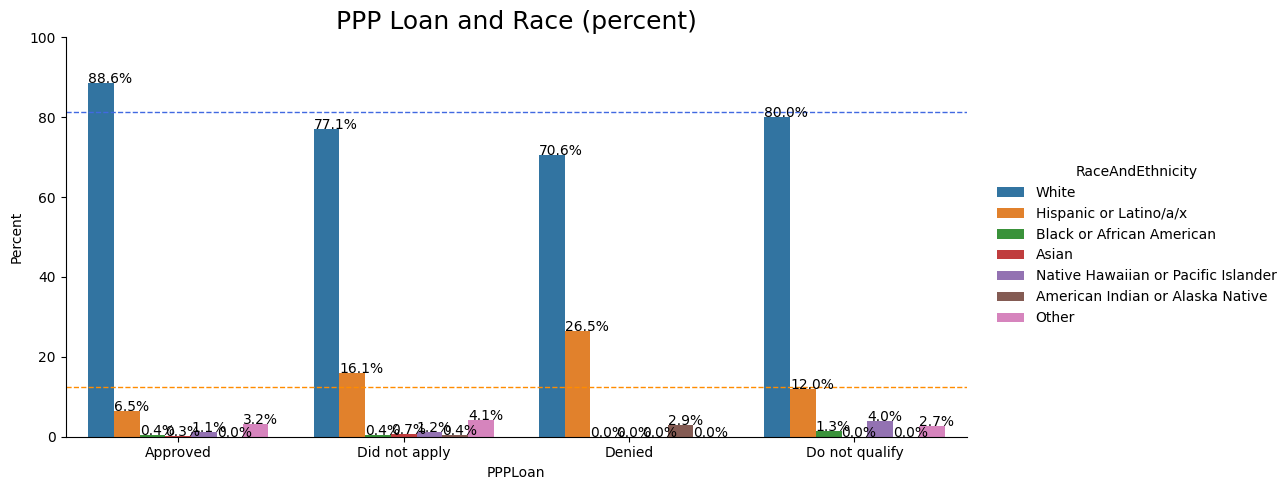

In [262]:
# convert to percentages
new_df = df_clean.groupby('PPPLoan')['RaceAndEthnicity'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='PPPLoan', y='Percent', hue='RaceAndEthnicity', kind='bar', data=new_df, height=5, aspect = 2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('PPP Loan and Race (percent)', fontsize=18)
g.map(plt.axhline, y=latinxEntrep, ls='--', color='darkorange', linewidth=1)
g.map(plt.axhline, y=whiteEntrep, ls='--', color='royalblue', linewidth=1)

In [263]:
df_clean['Education'] = pd.Categorical(df_clean['Education'],
                                         categories = ['Less than high school', 'High school graduate or GED', 'Some college',
                                                       'Associates degree', 'Bachelors degree', 'Masters degree', 'Doctorate'],
                                         ordered = True)

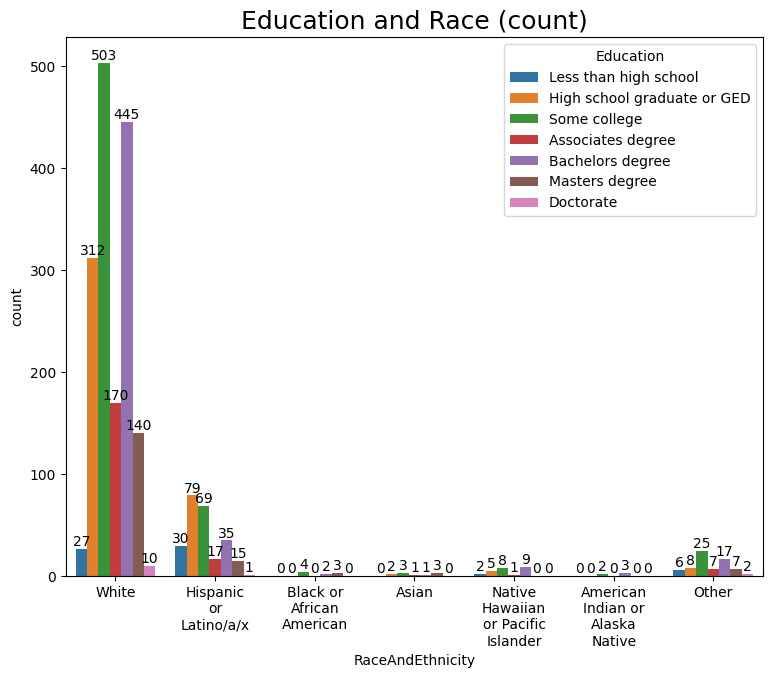

In [264]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'Education', data = df_clean)
#Add title
plt.title('Education and Race (count)', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

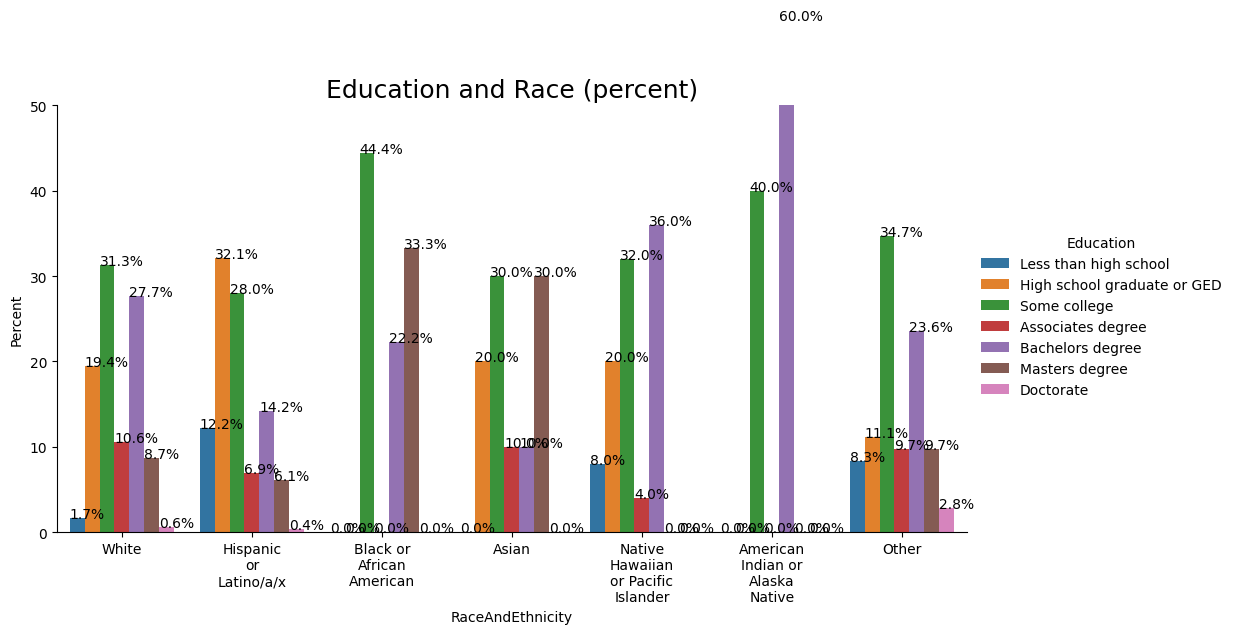

In [265]:
# convert to percentages
new_df = df_clean.groupby('RaceAndEthnicity')['Education'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='RaceAndEthnicity', y='Percent', hue='Education', kind='bar', data=new_df, height=5, aspect = 2)
g.ax.set_ylim(0,50)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('Education and Race (percent)', fontsize=18)

wrap_labels(g.ax, 10)

In [266]:
df_clean['EntityType'] = pd.Categorical(df_clean['EntityType'],
                                         categories = ['Sole Proprietorship', 'Limited Liability Company', 'Corporation',
                                                       'General Partnership', 'Limited Partnership', 'Limited Liability Partnership',
                                                       'Limited Liability Limited Partnership', 'Business Trust'],
                                         ordered = True)

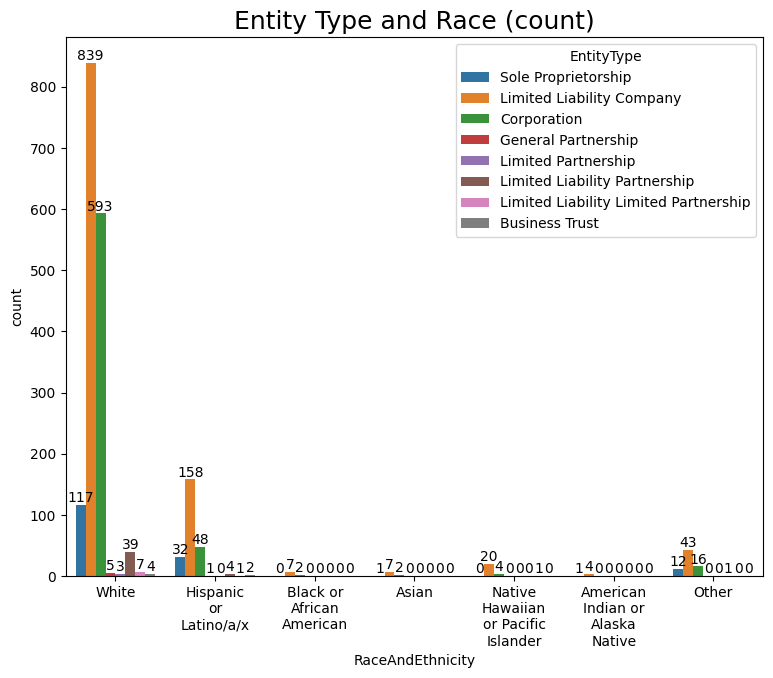

In [267]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'EntityType', data = df_clean)
#Add title
plt.title('Entity Type and Race (count)', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

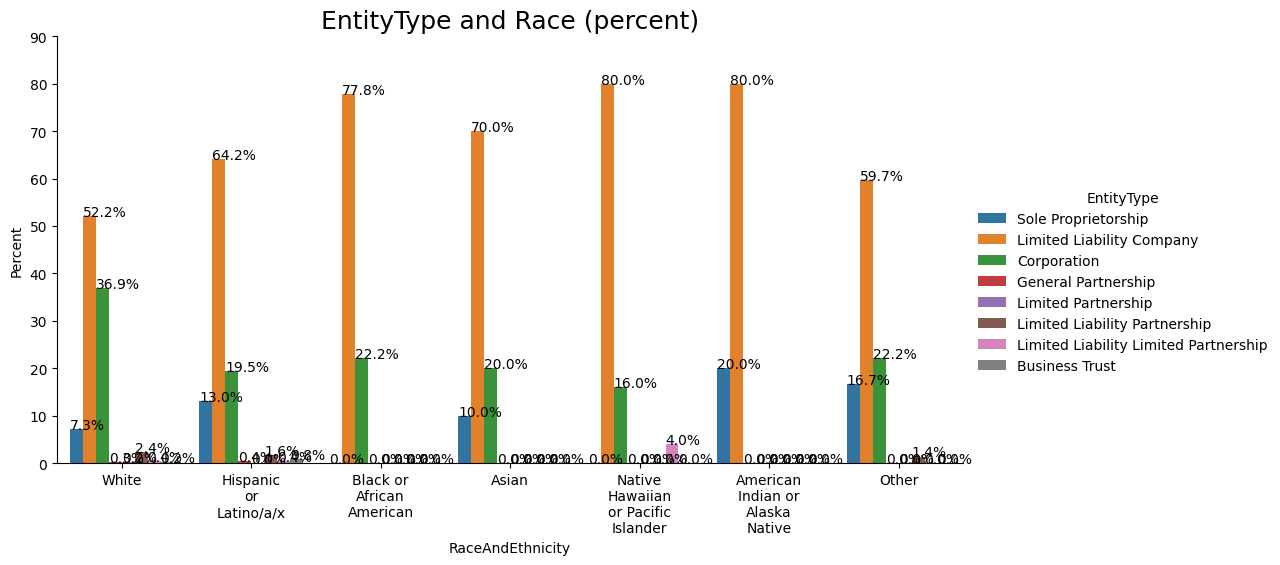

In [268]:
# convert to percentages
new_df = df_clean.groupby('RaceAndEthnicity')['EntityType'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='RaceAndEthnicity', y='Percent', hue='EntityType', kind='bar', data=new_df, height=5, aspect = 2)
g.ax.set_ylim(0,90)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('EntityType and Race (percent)', fontsize=18)

wrap_labels(g.ax, 10)

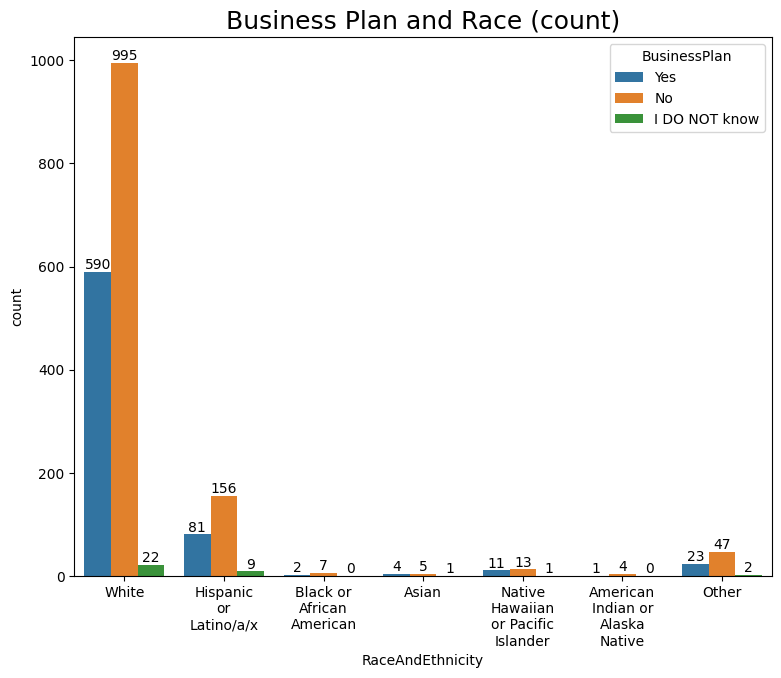

In [269]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'BusinessPlan', data = df_clean)
#Add title
plt.title('Business Plan and Race (count)', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

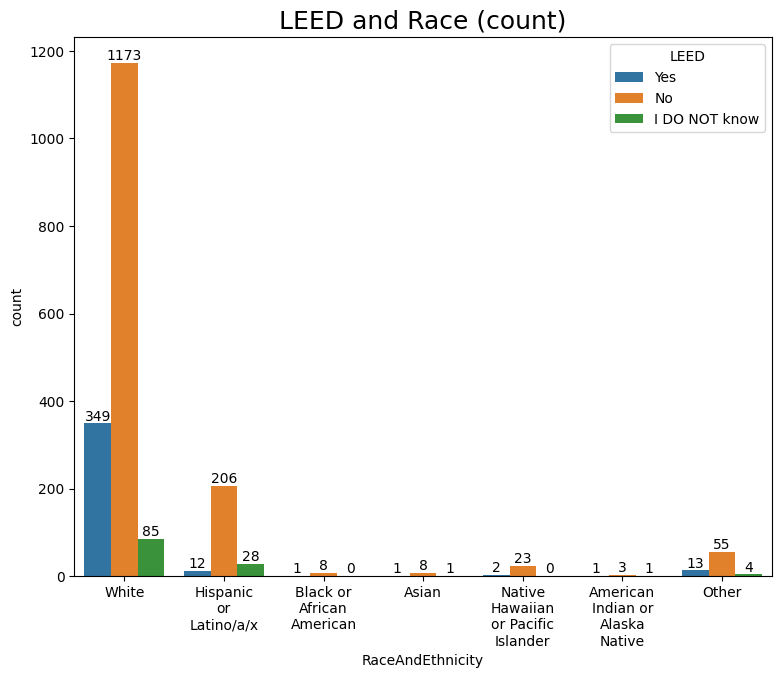

In [270]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'LEED', data = df_clean)
#Add title
plt.title('LEED and Race (count)', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

In [144]:
df_clean['EINApplication'] = pd.Categorical(df_clean['EINApplication'],
                                         categories = ['Social Security Number (SSN)',
                                                       'Individual Taxpayer Identification Number (ITIN)',
                                                       'Prefer not to answer'],
                                         ordered = True)

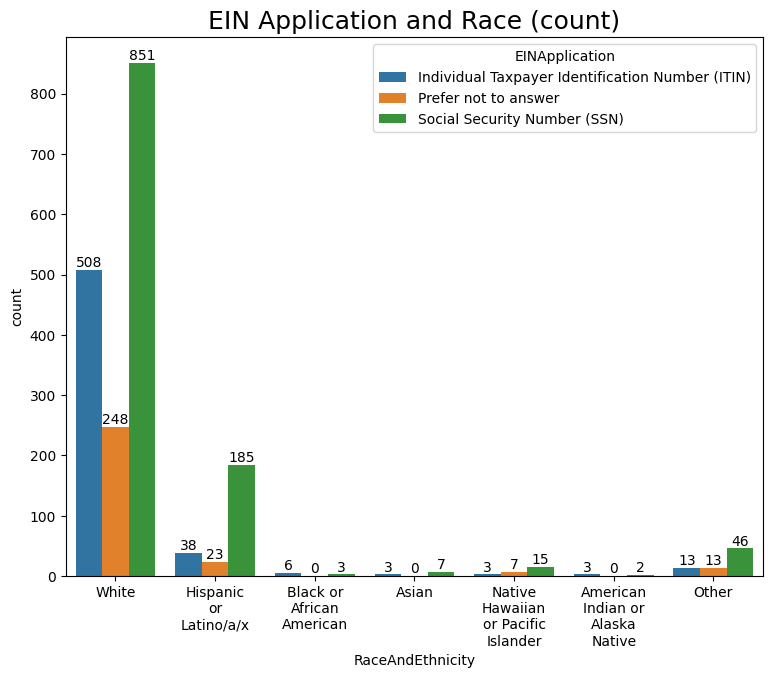

In [271]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'EINApplication', data = df_clean)
#Add title
plt.title('EIN Application and Race (count)', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

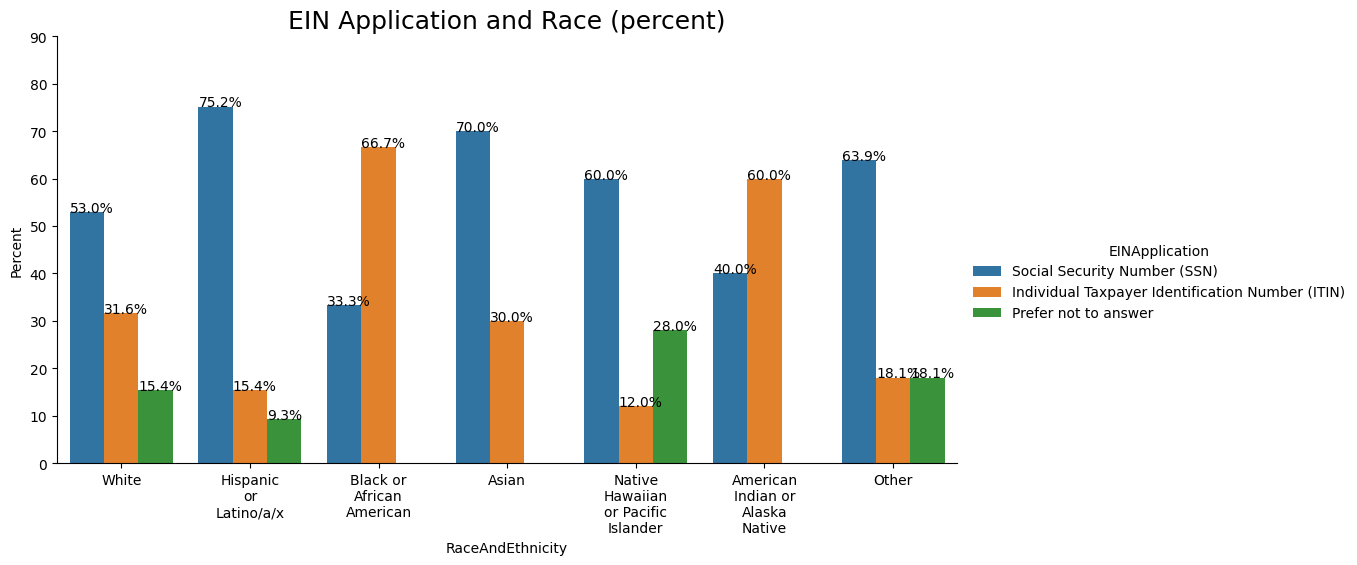

In [272]:
# convert to percentages
new_df = df_clean.groupby('RaceAndEthnicity')['EINApplication'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='RaceAndEthnicity', y='Percent', hue='EINApplication', kind='bar', data=new_df, height=5, aspect = 2)
g.ax.set_ylim(0,90)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('EIN Application and Race (percent)', fontsize=18)

wrap_labels(g.ax, 10)

In [273]:
df_clean['EnglishLanguage'] = pd.Categorical(df_clean['EnglishLanguage'],
                                         categories = ['Yes','No','Prefer not to say'],
                                         ordered = True)

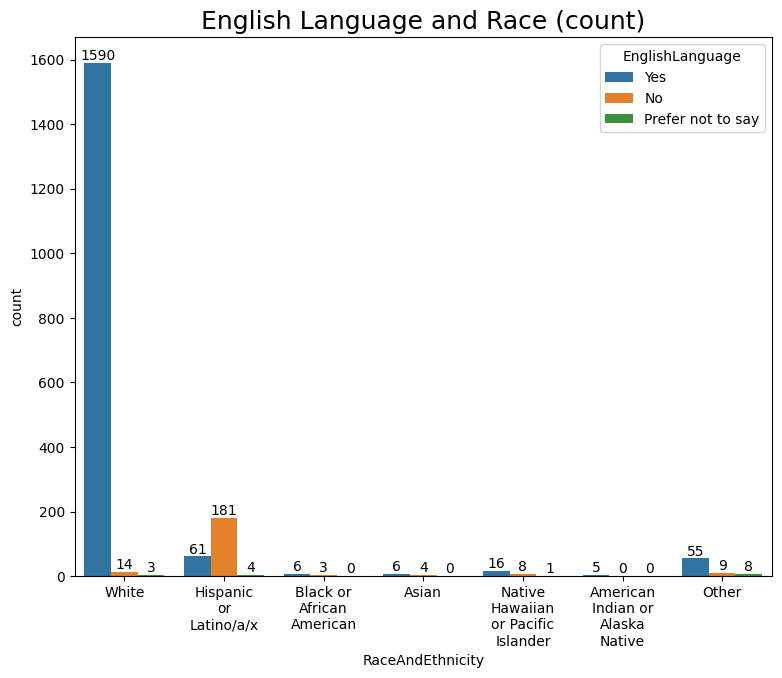

In [274]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'EnglishLanguage', data = df_clean)
#Add title
plt.title('English Language and Race (count)', fontsize=18)

for container in ax.containers:
    ax.bar_label(container)

wrap_labels(ax, 10)

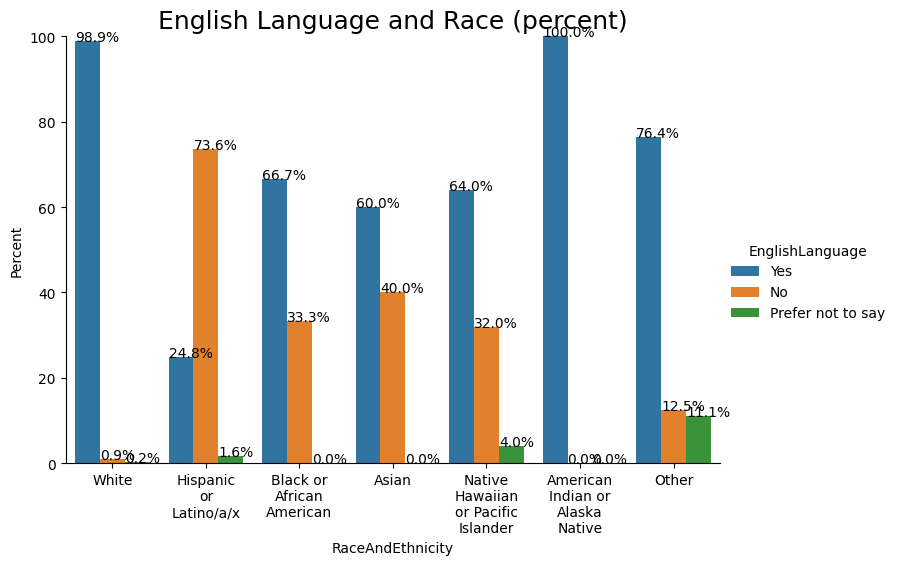

In [275]:
# convert to percentages
new_df = df_clean.groupby('RaceAndEthnicity')['EnglishLanguage'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='RaceAndEthnicity', y='Percent', hue='EnglishLanguage', kind='bar', data=new_df, height=5, aspect = 1.5)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title('English Language and Race (percent)', fontsize=18)

wrap_labels(g.ax, 10)

# Coding the Data

In [276]:
# create data frame for regression

df_reg = df_clean
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 8 to 2655
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   StartDate                1974 non-null   object  
 1   EndDate                  1974 non-null   object  
 2   Status                   1974 non-null   object  
 3   IPAddress                1974 non-null   object  
 4   Progress                 1974 non-null   object  
 5   Duration (in seconds)    1974 non-null   object  
 6   Finished                 1974 non-null   object  
 7   RecordedDate             1974 non-null   object  
 8   ResponseId               1974 non-null   object  
 9   RecipientLastName        0 non-null      object  
 10  RecipientFirstName       0 non-null      object  
 11  RecipientEmail           0 non-null      object  
 12  ExternalReference        0 non-null      object  
 13  LocationLatitude         1963 non-null   object  
 14  Location

In [277]:
# clean data
# drop columns
df_reg = df_reg.drop(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q23_7_TEXT', 'Q21_8_TEXT', 'PhoneNumber'], axis=1)

In [278]:
# change license classification categories to numerical
df_reg.loc[df_reg['LicenseClassification'] == 'B-100: General Building', 'LicenseClassification'] = "1" 
df_reg.loc[df_reg['LicenseClassification'] == 'R-100: Residential/Small Commercial', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'R-101: Residential/Small Commercial Non-Structural Remodel/Repair', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'E-100: General Engineering', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'E-200: General Electrical', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'P-200: General Plumbing Contractor', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'R-200: Factory Built Housing', 'LicenseClassification'] = "1" 
df_reg.loc[df_reg['LicenseClassification'] == 'E-201: Residential Electrical', 'LicenseClassification'] = "1"
df_reg.loc[df_reg['LicenseClassification'] == 'P-201: Residential Plumbing', 'LicenseClassification'] = "1"

df_reg.loc[df_reg['LicenseClassification'] == 'S-202: Solar Photovoltaic', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-220: Carpentry & Flooring', 'LicenseClassification'] = "0"  
df_reg.loc[df_reg['LicenseClassification'] == 'S-230: Masonry, Siding, Stucco, Glass, and Rain Gutter', 'LicenseClassification'] = "0"  
df_reg.loc[df_reg['LicenseClassification'] == 'S-260: Asphalt & Concrete', 'LicenseClassification'] = "0"  
df_reg.loc[df_reg['LicenseClassification'] == 'S-270: Drywall, Paint, and Plastering', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-280: Roofing', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-310: Foundation, Excavation, and Demolition', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-330: Landscape & Recreation', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-350: HVAC', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-370: Fire Suppression Systems', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-410: Boiler, Pipelines, Waste Water, and Water Conditioner', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-440: Sign Installation', 'LicenseClassification'] = "0"
df_reg.loc[df_reg['LicenseClassification'] == 'S-700: Limited Scope', 'LicenseClassification'] = "0"

df_reg['LicenseClassification'] = df_reg['LicenseClassification'].astype('int')

In [279]:
# change latinx shareholders > 50 percent
df_reg.loc[df_reg['LatinxOwned'] == 'Yes', 'LatinxOwned'] = "1"
df_reg.loc[df_reg['LatinxOwned'] == 'No', 'LatinxOwned'] = "0"
df_reg.loc[df_reg['LatinxOwned'] == 'I DO NOT know', 'LatinxOwned'] = "0"

df_reg['LatinxOwned'] = df_reg['LatinxOwned'].astype('int')

In [280]:
# change SBA Loan
df_reg['SBALoan'] = df_reg['SBALoan'].str.replace('Approved','1')  
df_reg['SBALoan'] = df_reg['SBALoan'].str.replace('Denied','0')
df_reg['SBALoan'] = df_reg['SBALoan'].str.replace('Did not apply','0')
df_reg['SBALoan'] = df_reg['SBALoan'].str.replace('Do not qualify','0')

#Convert to integer
df_reg['SBALoan'] = df_reg['SBALoan'].astype('int')


In [281]:
# change PPP Loan
df_reg['PPPLoan'] = df_reg['PPPLoan'].str.replace('Approved','1')  
df_reg['PPPLoan'] = df_reg['PPPLoan'].str.replace('Denied','0')
df_reg['PPPLoan'] = df_reg['PPPLoan'].str.replace('Did not apply','0')
df_reg['PPPLoan'] = df_reg['PPPLoan'].str.replace('Do not qualify','0')

#Convert to integer
df_reg['PPPLoan'] = df_reg['PPPLoan'].astype('int')

In [282]:
# change Bank Credit Union Loan
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].str.replace('Approved','1')  
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].str.replace('Denied','0')
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].str.replace('Did not apply','0')
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].str.replace('Do not qualify','0')

#Convert to integer
df_reg['BankCreditUnionLoan'] = df_reg['BankCreditUnionLoan'].astype('int')

In [283]:
# change Accountant CPA
df_reg.loc[df_reg['AccountantCPA'] == 'Yes', 'AccountantCPA'] = "1"
df_reg.loc[df_reg['AccountantCPA'] == 'No', 'AccountantCPA'] = "0"
df_reg.loc[df_reg['AccountantCPA'] == 'I DO NOT know', 'AccountantCPA'] = "0"

# Convert to integer
df_reg['AccountantCPA'] = df_reg['AccountantCPA'].astype('int')

In [284]:
# change business plan
df_reg.loc[df_reg['BusinessPlan'] == 'Yes', 'BusinessPlan'] = "1"
df_reg.loc[df_reg['BusinessPlan'] == 'No', 'BusinessPlan'] = "0"
df_reg.loc[df_reg['BusinessPlan'] == 'I DO NOT know', 'BusinessPlan'] = "0"

# Convert to integer
df_reg['BusinessPlan'] = df_reg['BusinessPlan'].astype('int')

In [285]:
# change gender
df_reg.loc[df_reg['Gender'] == 'Male', 'Gender'] = "1"
df_reg.loc[df_reg['Gender'] == 'Female', 'Gender'] = "0"
df_reg.loc[df_reg['Gender'] == 'Non-binary / third gender', 'Gender'] = "0"
df_reg.loc[df_reg['Gender'] == 'Prefer not to say', 'Gender'] = "0"

# Convert to integer
df_reg['Gender'] = df_reg['Gender'].astype('int')


In [286]:
# change outstanding debt
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$0', 'TotalOutstandingDebt'] = "0"
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$25k or less', 'TotalOutstandingDebt'] = "12.5"
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$25k-$100k', 'TotalOutstandingDebt'] = "62.5"
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$100k-$250k', 'TotalOutstandingDebt'] = "175"
df_reg.loc[df_reg['TotalOutstandingDebt'] == '$250k-$1M', 'TotalOutstandingDebt'] = "625"
df_reg.loc[df_reg['TotalOutstandingDebt'] == 'More than $1M', 'TotalOutstandingDebt'] = "1500"

# Convert to integer
df_reg['TotalOutstandingDebt'] = df_reg['TotalOutstandingDebt'].astype('float')


In [287]:
# change Revenue
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$0','0', regex=True)  
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$25k or less','12.5', regex=True)
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$25k \- \$100k','62.5', regex=True)
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$100k \- \$250k','175', regex=True)
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('\$250k \- \$1M','625', regex=True)
df_reg['Revenue2022'] = df_reg['Revenue2022'].str.replace('More than \$1M','1500', regex=True)

#Convert to integer
df_reg['Revenue2022'] = df_reg['Revenue2022'].astype('float')


In [288]:
# change homeowner
df_reg.loc[df_reg['HomeOwner'] == 'Yes', 'HomeOwner'] = "1"
df_reg.loc[df_reg['HomeOwner'] == 'No', 'HomeOwner'] = "0"
df_reg.loc[df_reg['HomeOwner'] == 'Prefer not to say', 'HomeOwner'] = "0"

# Convert to integer
df_reg['HomeOwner'] = df_reg['HomeOwner'].astype('int')


In [289]:
# change LEED
df_reg.loc[df_reg['LEED'] == 'Yes', 'LEED'] = "1"
df_reg.loc[df_reg['LEED'] == 'No', 'LEED'] = "0"
df_reg.loc[df_reg['LEED'] == 'I DO NOT know', 'LEED'] = "0"

# Convert to integer
df_reg['LEED'] = df_reg['LEED'].astype('int')


In [290]:
# change number of employees
df_reg.loc[df_reg['NumOfEmployees'] == '0 or Family', 'NumOfEmployees'] = "0"
df_reg.loc[df_reg['NumOfEmployees'] == 'Less than 5', 'NumOfEmployees'] = "5"
df_reg.loc[df_reg['NumOfEmployees'] == '5-10', 'NumOfEmployees'] = "10"
df_reg.loc[df_reg['NumOfEmployees'] == '11-20', 'NumOfEmployees'] = "15"
df_reg.loc[df_reg['NumOfEmployees'] == '20+', 'NumOfEmployees'] = "25"

# Convert to integer
df_reg['NumOfEmployees'] = df_reg['NumOfEmployees'].astype('int')


In [291]:
# change work accident
df_reg.loc[df_reg['WorkAccidents'] == 'None', 'WorkAccidents'] = "0"
df_reg.loc[df_reg['WorkAccidents'] == '20+', 'WorkAccidents'] = "25"

# Convert to integer
df_reg['WorkAccidents'] = df_reg['WorkAccidents'].astype('int')


In [292]:
# change years of work experience
df_reg.loc[df_reg['YearsofExperience'] == 'less than 1 year', 'YearsofExperience'] = "0"
df_reg.loc[df_reg['YearsofExperience'] == '60+', 'YearsofExperience'] = "60"

# Convert to integer
df_reg['YearsofExperience'] = df_reg['YearsofExperience'].astype('int')


In [293]:
#change english language

df_reg['EnglishLanguage'] = df_reg['EnglishLanguage'].str.replace('Yes','1', regex=True)
df_reg['EnglishLanguage'] = df_reg['EnglishLanguage'].str.replace('No','0', regex=True)
df_reg['EnglishLanguage'] = df_reg['EnglishLanguage'].str.replace('Prefer not to say','0', regex=True)

# Convert to integer
df_reg['EnglishLanguage'] = df_reg['EnglishLanguage'].astype('int')


In [294]:
# change EIN

df_reg['EINApplication'] = df_reg['EINApplication'].str.replace('Social Security Number \(SSN\)','1', regex=True)
df_reg['EINApplication'] = df_reg['EINApplication'].str.replace('Individual Taxpayer Identification Number \(ITIN\)','0', regex=True)
df_reg['EINApplication'] = df_reg['EINApplication'].str.replace('Prefer not to answer','0', regex=True)

# Convert to integer
df_reg['EINApplication'] = df_reg['EINApplication'].astype('int')

In [295]:
# change Latinx Employees Percent
df_reg.loc[df_reg['LatinxEmployeesPercent'] == '0%', 'LatinxEmployeesPercent'] = "0"
df_reg.loc[df_reg['LatinxEmployeesPercent'] == 'Less than 25%', 'LatinxEmployeesPercent'] = "1"
df_reg.loc[df_reg['LatinxEmployeesPercent'] == '25-50%', 'LatinxEmployeesPercent'] = "2"
df_reg.loc[df_reg['LatinxEmployeesPercent'] == '51-75%', 'LatinxEmployeesPercent'] = "3"
df_reg.loc[df_reg['LatinxEmployeesPercent'] == '76-100%', 'LatinxEmployeesPercent'] = "4"

# Convert to integer
df_reg['LatinxEmployeesPercent'] = df_reg['LatinxEmployeesPercent'].astype('int')


In [296]:
# change entity type
df_reg.loc[df_reg['EntityType'] == 'Limited Liability Company', 'LLC'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Limited Liability Company', 'LLC'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Sole Proprietorship', 'SoleP'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Sole Proprietorship', 'SoleP'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Limited Partnership', 'LP'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Limited Partnership', 'LP'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Limited Liability Partnership', 'LLP'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Limited Liability Partnership', 'LLP'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Limited Liability Limited Partnership', 'LLLP'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Limited Liability Limited Partnership', 'LLLP'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Corporation', 'Corp'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Corporation', 'Corp'] = "0"

df_reg.loc[df_reg['EntityType'] == 'General Partnership', 'GenP'] = "1"
df_reg.loc[df_reg['EntityType'] != 'General Partnership', 'GenP'] = "0"

df_reg.loc[df_reg['EntityType'] == 'Business Trust', 'BTrust'] = "1"
df_reg.loc[df_reg['EntityType'] != 'Business Trust', 'BTrust'] = "0"

# Convert to integer
df_reg['LLC'] = df_reg['LLC'].astype('int')
df_reg['SoleP'] = df_reg['SoleP'].astype('int')
df_reg['LP'] = df_reg['LP'].astype('int')
df_reg['LLP'] = df_reg['LLP'].astype('int')
df_reg['LLLP'] = df_reg['LLLP'].astype('int')
df_reg['Corp'] = df_reg['Corp'].astype('int')
df_reg['GenP'] = df_reg['GenP'].astype('int')
df_reg['BTrust'] = df_reg['BTrust'].astype('int')


In [297]:
# change education
df_reg.loc[df_reg['Education'] == 'Less than high school', 'LessThanHS'] = "1"
df_reg.loc[df_reg['Education'] != 'Less than high school', 'LessThanHS'] = "0"

df_reg.loc[df_reg['Education'] == 'High school graduate or GED', 'HighSchool'] = "1"
df_reg.loc[df_reg['Education'] != 'High school graduate or GED', 'HighSchool'] = "0"

df_reg.loc[df_reg['Education'] == 'Some college', 'SomeCollege'] = "1"
df_reg.loc[df_reg['Education'] != 'Some college', 'SomeCollege'] = "0"

df_reg.loc[df_reg['Education'] == 'Associates degree', 'Associate'] = "1"
df_reg.loc[df_reg['Education'] != 'Associates degree', 'Associate'] = "0"

df_reg.loc[df_reg['Education'] == 'Bachelors degree', 'Bachelor'] = "1"
df_reg.loc[df_reg['Education'] != 'Bachelors degree', 'Bachelor'] = "0"

df_reg.loc[df_reg['Education'] == 'Masters degree', 'Master'] = "1"
df_reg.loc[df_reg['Education'] != 'Masters degree', 'Master'] = "0"

df_reg.loc[df_reg['Education'] == 'Doctorate', 'Doctorate'] = "1"
df_reg.loc[df_reg['Education'] != 'Doctorate', 'Doctorate'] = "0"

# convert to integer

df_reg['LessThanHS'] = df_reg['LessThanHS'].astype('int')
df_reg['HighSchool'] = df_reg['HighSchool'].astype('int')
df_reg['SomeCollege'] = df_reg['SomeCollege'].astype('int')
df_reg['Associate'] = df_reg['Associate'].astype('int')
df_reg['Bachelor'] = df_reg['Bachelor'].astype('int')
df_reg['Master'] = df_reg['Master'].astype('int')
df_reg['Doctorate'] = df_reg['Doctorate'].astype('int')


In [298]:
# change race and ethnicity
df_reg.loc[df_reg['RaceAndEthnicity'] == 'White', 'White'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'White', 'White'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'Hispanic or Latino/a/x', 'Latinx'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'Hispanic or Latino/a/x', 'Latinx'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'Black or African American', 'Black'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'Black or African American', 'Black'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'Native Hawaiian or Pacific Islander', 'PacificIslander'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'Native Hawaiian or Pacific Islander', 'PacificIslander'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'American Indian or Alaska Native', 'NativeAmerican'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'American Indian or Alaska Native', 'NativeAmerican'] = "0"

df_reg.loc[df_reg['RaceAndEthnicity'] == 'Asian', 'Asian'] = "1"
df_reg.loc[df_reg['RaceAndEthnicity'] != 'Asian', 'Asian'] = "0"

# convert to integer
df_reg['White'] = df_reg['White'].astype('int')
df_reg['Latinx'] = df_reg['Latinx'].astype('int')
df_reg['Black'] = df_reg['Black'].astype('int')
df_reg['PacificIslander'] = df_reg['PacificIslander'].astype('int')
df_reg['NativeAmerican'] = df_reg['NativeAmerican'].astype('int')
df_reg['Asian'] = df_reg['Asian'].astype('int')


In [299]:
# change construction focus
df_reg.loc[df_reg['ConstructionFocus'] == 'Residential', 'Residential'] = "1"
df_reg.loc[df_reg['ConstructionFocus'] != 'Residential', 'Residential'] = "0"

df_reg.loc[df_reg['ConstructionFocus'] == 'Commercial', 'Commercial'] = "1"
df_reg.loc[df_reg['ConstructionFocus'] != 'Commercial', 'Commercial'] = "0"

df_reg.loc[df_reg['ConstructionFocus'] == 'Industrial', 'Industrial'] = "1"
df_reg.loc[df_reg['ConstructionFocus'] != 'Industrial', 'Industrial'] = "0"

df_reg.loc[df_reg['ConstructionFocus'] == 'Infrastructure', 'Infrastructure'] = "1"
df_reg.loc[df_reg['ConstructionFocus'] != 'Infrastructure', 'Infrastructure'] = "0"

# convert to integer
df_reg['Residential'] = df_reg['Residential'].astype('int')
df_reg['Commercial'] = df_reg['Commercial'].astype('int')
df_reg['Industrial'] = df_reg['Industrial'].astype('int')
df_reg['Infrastructure'] = df_reg['Infrastructure'].astype('int')


In [300]:
# change age

df_reg.loc[df_reg['Age'] == '18 - 24', 'Age'] = "18"
df_reg.loc[df_reg['Age'] == '25 - 34', 'Age'] = "25"
df_reg.loc[df_reg['Age'] == '35 - 44', 'Age'] = "35"
df_reg.loc[df_reg['Age'] == '45 - 54', 'Age'] = "45"
df_reg.loc[df_reg['Age'] == '55 - 64', 'Age'] = "55"
df_reg.loc[df_reg['Age'] == '65 - 74', 'Age'] = "65"
df_reg.loc[df_reg['Age'] == '75 - 84', 'Age'] = "75"
df_reg.loc[df_reg['Age'] == '85 or older', 'Age'] = "85"

# convert to integer
df_reg['Age'] = df_reg['Age'].astype('int')


In [301]:
# change Credit Score

df_reg.loc[df_reg['CreditScore'] == 'less than 620', 'CreditScore'] = "310"
df_reg.loc[df_reg['CreditScore'] == '620-719', 'CreditScore'] = "670"
df_reg.loc[df_reg['CreditScore'] == '720+', 'CreditScore'] = "785"
df_reg.loc[df_reg['CreditScore'] == 'Prefer not to say', 'CreditScore'] = "670"


# convert to integer
df_reg['CreditScore'] = df_reg['CreditScore'].astype('int')


In [302]:
# change Loan Officer Relationship

df_reg.loc[df_reg['LoanOfficerRelationship'] == 'No Relationship', 'LoanOfficerRelationship'] = "0"
df_reg.loc[df_reg['LoanOfficerRelationship'] == 'Terrible', 'LoanOfficerRelationship'] = "1"
df_reg.loc[df_reg['LoanOfficerRelationship'] == 'Poor', 'LoanOfficerRelationship'] = "2"
df_reg.loc[df_reg['LoanOfficerRelationship'] == 'Average', 'LoanOfficerRelationship'] = "3"
df_reg.loc[df_reg['LoanOfficerRelationship'] == 'Good', 'LoanOfficerRelationship'] = "4"
df_reg.loc[df_reg['LoanOfficerRelationship'] == 'Excellent', 'LoanOfficerRelationship'] = "5"

# convert to integer
df_reg['LoanOfficerRelationship'] = df_reg['LoanOfficerRelationship'].astype('int')


In [303]:
# change to number of consulting services that they know
df_reg['ConsultingServices'] = df_reg['ConsultingServices'].str.replace(" ", "")
df_reg['ConsultingServices'] = df_reg['ConsultingServices'].fillna("")
df_reg['#ConsultingServices'] = df_reg['ConsultingServices'].apply(lambda x: len(x.split(',')))

# convert to integer
df_reg['#ConsultingServices'] = df_reg['#ConsultingServices'].astype('int')


In [304]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 8 to 2655
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   LicenseClassification    1974 non-null   int64   
 1   EntityType               1974 non-null   category
 2   LatinxOwned              1974 non-null   int64   
 3   Age                      1974 non-null   int64   
 4   RaceAndEthnicity         1974 non-null   category
 5   Gender                   1974 non-null   int64   
 6   Education                1974 non-null   category
 7   CreditScore              1974 non-null   int64   
 8   HomeOwner                1974 non-null   int64   
 9   EnglishLanguage          1974 non-null   int64   
 10  YearsofExperience        1974 non-null   int64   
 11  ConstructionFocus        1974 non-null   object  
 12  LEED                     1974 non-null   int64   
 13  BusinessPlan             1974 non-null   int64   
 14  EINAppli

# Descriptive Statistics

In [305]:
# allows all the columns to be shown when using .describe()
pd.set_option('display.max_columns', 500)

# descriptive statistics for all survey respondents
df_reg.describe()

,LicenseClassification,LatinxOwned,Age,Gender,CreditScore,HomeOwner,EnglishLanguage,YearsofExperience,LEED,BusinessPlan,EINApplication,NumOfEmployees,LatinxEmployeesPercent,WorkAccidents,SBALoan,PPPLoan,BankCreditUnionLoan,LoanOfficerRelationship,AccountantCPA,Revenue2022,TotalOutstandingDebt,LLC,SoleP,LP,LLP,LLLP,Corp,GenP,BTrust,LessThanHS,HighSchool,SomeCollege,Associate,Bachelor,Master,Doctorate,White,Latinx,Black,PacificIslander,NativeAmerican,Asian,Residential,Commercial,Industrial,Infrastructure,#ConsultingServices
count,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000
mean,0.712259,0.150456,43.640831,0.867275,732.973658,0.837893,0.880952,14.401722,0.191996,0.360689,0.561803,8.297872,1.239108,0.371327,0.208207,0.376900,0.365248,3.389058,0.864742,743.078774,177.874873,0.546099,0.082573,0.001520,0.022290,0.004559,0.336879,0.003040,0.003040,0.032928,0.205674,0.311044,0.099291,0.259372,0.085106,0.006586,0.814083,0.124620,0.004559,0.012665,0.002533,0.005066,0.666160,0.257345,0.036981,0.039514,1.304965
std,0.452824,0.357608,12.981025,0.339364,99.757422,0.368643,0.323927,13.317299,0.393970,0.480322,0.496291,8.292696,1.423704,1.386858,0.406128,0.484732,0.481622,1.750998,0.342086,625.182044,383.941547,0.497996,0.275306,0.038964,0.147662,0.067385,0.472763,0.055062,0.055062,0.178494,0.404296,0.463038,0.299128,0.438401,0.279111,0.080905,0.389138,0.330371,0.067385,0.111851,0.050277,0.071012,0.471703,0.437282,0.188762,0.194863,0.739999
min,0.000000,0.000000,18.000000,0.000000,310.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,35.000000,1.000000,670.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,45.000000,1.000000,785.000000,1.000000,1.000000,10.000000,0.000000,0.000000,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,625.000000,12.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,55.000000,1.000000,785.000000,1.000000,1.000000,23.000000,0.000000,1.000000,1.000000,10.000000,2.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,1500.000000,62.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,785.000000,1.000000,1.000000,60.000000,1.000000,1.000000,1.000000,25.000000,4.000000,25.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1500.000000,1500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

In [306]:
# descriptive statistics for white survey respondents
df_reg[df_reg['RaceAndEthnicity']=='White'].describe()

,LicenseClassification,LatinxOwned,Age,Gender,CreditScore,HomeOwner,EnglishLanguage,YearsofExperience,LEED,BusinessPlan,EINApplication,NumOfEmployees,LatinxEmployeesPercent,WorkAccidents,SBALoan,PPPLoan,BankCreditUnionLoan,LoanOfficerRelationship,AccountantCPA,Revenue2022,TotalOutstandingDebt,LLC,SoleP,LP,LLP,LLLP,Corp,GenP,BTrust,LessThanHS,HighSchool,SomeCollege,Associate,Bachelor,Master,Doctorate,White,Latinx,Black,PacificIslander,NativeAmerican,Asian,Residential,Commercial,Industrial,Infrastructure,#ConsultingServices
count,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.0,1607.0,1607.0,1607.0,1607.0,1607.0,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000
mean,0.754200,0.035470,45.010579,0.892968,741.017424,0.866833,0.989421,15.986932,0.217175,0.367144,0.529558,8.677660,0.945240,0.378345,0.221531,0.410081,0.392035,3.433727,0.883634,796.787492,198.459863,0.522091,0.072806,0.001867,0.024269,0.004356,0.369011,0.003111,0.002489,0.016801,0.194151,0.313006,0.105787,0.276914,0.087119,0.006223,1.0,0.0,0.0,0.0,0.0,0.0,0.647169,0.270691,0.039203,0.042937,1.301805
std,0.430694,0.185022,12.648639,0.309250,87.772034,0.339861,0.102339,13.579908,0.412451,0.482176,0.499281,8.482824,1.191288,1.325571,0.415406,0.492001,0.488356,1.749345,0.320763,624.645359,405.246042,0.499667,0.259899,0.043180,0.153930,0.065876,0.482687,0.055710,0.049844,0.128567,0.395668,0.463861,0.307661,0.447613,0.282097,0.078663,0.0,0.0,0.0,0.0,0.0,0.0,0.478000,0.444455,0.194139,0.202779,0.723483
min,0.000000,0.000000,18.000000,0.000000,310.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,35.000000,1.000000,670.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,45.000000,1.000000,785.000000,1.000000,1.000000,14.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,625.000000,12.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,55.000000,1.000000,785.000000,1.000000,1.000000,25.000000,0.000000,1.000000,1.000000,15.000000,2.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,1500.000000,175.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,785.000000,1.000000,1.000000,60.000000,1.000000,1.000000,1.000000,25.000000,4.000000,25.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1500.000000,1500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,7.000000


In [307]:
# descriptive statistics for Latinx survey respondents
df_reg[df_reg['RaceAndEthnicity']=='Hispanic or Latino/a/x'].describe()

,LicenseClassification,LatinxOwned,Age,Gender,CreditScore,HomeOwner,EnglishLanguage,YearsofExperience,LEED,BusinessPlan,EINApplication,NumOfEmployees,LatinxEmployeesPercent,WorkAccidents,SBALoan,PPPLoan,BankCreditUnionLoan,LoanOfficerRelationship,AccountantCPA,Revenue2022,TotalOutstandingDebt,LLC,SoleP,LP,LLP,LLLP,Corp,GenP,BTrust,LessThanHS,HighSchool,SomeCollege,Associate,Bachelor,Master,Doctorate,White,Latinx,Black,PacificIslander,NativeAmerican,Asian,Residential,Commercial,Industrial,Infrastructure,#ConsultingServices
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.0,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.0,246.0,246.0,246.0,246.0,246.0,246.000000,246.000000,246.000000,246.000000,246.000000
mean,0.426829,0.878049,35.313008,0.747967,686.056911,0.686992,0.247967,5.804878,0.048780,0.329268,0.752033,6.890244,3.288618,0.337398,0.117886,0.195122,0.211382,3.073171,0.743902,448.475610,65.853659,0.642276,0.130081,0.0,0.016260,0.004065,0.195122,0.004065,0.008130,0.121951,0.321138,0.280488,0.069106,0.142276,0.060976,0.004065,0.0,1.0,0.0,0.0,0.0,0.0,0.768293,0.191057,0.020325,0.020325,1.256098
std,0.495625,0.327897,11.859191,0.435065,145.389346,0.464663,0.432713,7.343645,0.215848,0.470906,0.432713,6.909336,1.175443,1.155282,0.323131,0.397102,0.409121,1.715099,0.437366,532.243723,194.608930,0.480307,0.337079,0.0,0.126732,0.063758,0.397102,0.063758,0.089983,0.327897,0.467866,0.450153,0.254151,0.350046,0.239773,0.063758,0.0,0.0,0.0,0.0,0.0,0.0,0.422783,0.393935,0.141398,0.141398,0.708162
min,0.000000,0.000000,18.000000,0.000000,310.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,25.000000,0.250000,670.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,62.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,35.000000,1.000000,670.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,175.000000,12.500000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,45.000000,1.000000,785.000000,1.000000,0.000000,6.000000,0.000000,1.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,625.000000,62.500000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,65.000000,1.000000,785.000000,1.000000,1.000000,50.000000,1.000000,1.000000,1.000000,25.000000,4.000000,10.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1500.000000,1500.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,7.000000


In [308]:
# descriptive statistics for Black survey respondents
df_reg[df_reg['RaceAndEthnicity']=='Black or African American'].describe()

,LicenseClassification,LatinxOwned,Age,Gender,CreditScore,HomeOwner,EnglishLanguage,YearsofExperience,LEED,BusinessPlan,EINApplication,NumOfEmployees,LatinxEmployeesPercent,WorkAccidents,SBALoan,PPPLoan,BankCreditUnionLoan,LoanOfficerRelationship,AccountantCPA,Revenue2022,TotalOutstandingDebt,LLC,SoleP,LP,LLP,LLLP,Corp,GenP,BTrust,LessThanHS,HighSchool,SomeCollege,Associate,Bachelor,Master,Doctorate,White,Latinx,Black,PacificIslander,NativeAmerican,Asian,Residential,Commercial,Industrial,Infrastructure,#ConsultingServices
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.0,9.0,9.0,9.000000,9.0,9.0,9.0,9.0,9.000000,9.0,9.000000,9.000000,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.666667,0.222222,41.666667,0.777778,733.888889,0.777778,0.666667,12.111111,0.111111,0.222222,0.333333,5.000000,1.222222,0.222222,0.111111,0.333333,0.333333,3.555556,0.666667,575.000000,263.888889,0.777778,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.0,0.444444,0.0,0.222222,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.555556,0.222222,0.111111,0.111111,1.444444
std,0.500000,0.440959,15.000000,0.440959,60.610322,0.440959,0.500000,16.266872,0.333333,0.440959,0.500000,7.905694,1.563472,0.440959,0.333333,0.500000,0.500000,2.127858,0.500000,584.667373,506.035620,0.440959,0.0,0.0,0.0,0.0,0.440959,0.0,0.0,0.0,0.0,0.527046,0.0,0.440959,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.527046,0.440959,0.333333,0.333333,0.726483
min,0.000000,0.000000,25.000000,0.000000,670.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,35.000000,1.000000,670.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,62.500000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,35.000000,1.000000,785.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,625.000000,12.500000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,45.000000,1.000000,785.000000,1.000000,1.000000,25.000000,0.000000,0.000000,1.000000,5.000000,2.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,625.000000,175.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,65.000000,1.000000,785.000000,1.000000,1.000000,45.000000,1.000000,1.000000,1.000000,25.000000,4.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1500.000000,1500.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,3.000000


In [309]:
# descriptive statistics for Asian survey respondents
df_reg[df_reg['RaceAndEthnicity']=='Asian'].describe()

,LicenseClassification,LatinxOwned,Age,Gender,CreditScore,HomeOwner,EnglishLanguage,YearsofExperience,LEED,BusinessPlan,EINApplication,NumOfEmployees,LatinxEmployeesPercent,WorkAccidents,SBALoan,PPPLoan,BankCreditUnionLoan,LoanOfficerRelationship,AccountantCPA,Revenue2022,TotalOutstandingDebt,LLC,SoleP,LP,LLP,LLLP,Corp,GenP,BTrust,LessThanHS,HighSchool,SomeCollege,Associate,Bachelor,Master,Doctorate,White,Latinx,Black,PacificIslander,NativeAmerican,Asian,Residential,Commercial,Industrial,Infrastructure,#ConsultingServices
count,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.00000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.000000,10.0,10.0,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,10.000000,10.000000,10.0,10.000000
mean,0.800000,0.100000,43.000000,0.900000,726.00000,0.900000,0.600000,7.50000,0.100000,0.400000,0.700000,5.500000,0.800000,0.200000,0.300000,0.200000,0.200000,3.200000,1.0,540.00000,31.250000,0.700000,0.100000,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.200000,0.300000,0.100000,0.100000,0.300000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.600000,0.300000,0.100000,0.0,1.700000
std,0.421637,0.316228,10.327956,0.316228,150.56929,0.316228,0.516398,5.87367,0.316228,0.516398,0.483046,5.986095,0.918937,0.632456,0.483046,0.421637,0.421637,1.932184,0.0,686.42087,56.596157,0.483046,0.316228,0.0,0.0,0.0,0.421637,0.0,0.0,0.0,0.421637,0.483046,0.316228,0.316228,0.483046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.516398,0.483046,0.316228,0.0,1.251666
min,0.000000,0.000000,25.000000,0.000000,310.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,12.50000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,1.000000
25%,1.000000,0.000000,35.000000,1.000000,785.00000,1.000000,0.000000,3.50000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.250000,1.0,62.50000,0.000000,0.250000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,1.000000
50%,1.000000,0.000000,45.000000,1.000000,785.00000,1.000000,1.000000,6.50000,0.000000,0.000000,1.000000,5.000000,0.500000,0.000000,0.000000,0.000000,0.000000,4.000000,1.0,62.50000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,0.0,1.000000
75%,1.000000,0.000000,52.500000,1.000000,785.00000,1.000000,1.000000,11.75000,0.000000,1.000000,1.000000,8.750000,1.750000,0.000000,0.750000,0.000000,0.000000,4.750000,1.0,1281.25000,50.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.750000,0.000000,0.000000,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.750000,0.000000,0.0,1.750000
max,1.000000,1.000000,55.000000,1.000000,785.00000,1.000000,1.000000,18.00000,1.000000,1.000000,1.000000,15.000000,2.000000,2.000000,1.000000,1.000000,1.000000,5.000000,1.0,1500.00000,175.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,0.0,4.000000


In [310]:
# descriptive statistics for Pacific Islander survey respondents
df_reg[df_reg['RaceAndEthnicity']=='Native Hawaiian or Pacific Islander'].describe()

,LicenseClassification,LatinxOwned,Age,Gender,CreditScore,HomeOwner,EnglishLanguage,YearsofExperience,LEED,BusinessPlan,EINApplication,NumOfEmployees,LatinxEmployeesPercent,WorkAccidents,SBALoan,PPPLoan,BankCreditUnionLoan,LoanOfficerRelationship,AccountantCPA,Revenue2022,TotalOutstandingDebt,LLC,SoleP,LP,LLP,LLLP,Corp,GenP,BTrust,LessThanHS,HighSchool,SomeCollege,Associate,Bachelor,Master,Doctorate,White,Latinx,Black,PacificIslander,NativeAmerican,Asian,Residential,Commercial,Industrial,Infrastructure,#ConsultingServices
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.0,25.0,25.00,25.000000,25.0,25.0,25.000000,25.000000,25.000000,25.00,25.000000,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.00000,25.000000,25.0,25.00,25.000000
mean,0.680000,0.200000,37.800000,0.800000,691.200000,0.76000,0.640000,6.040000,0.080000,0.440000,0.6,5.800000,1.160000,0.120000,0.320000,0.320000,0.280000,3.640000,0.880000,652.000000,97.000000,0.800000,0.0,0.0,0.0,0.04,0.160000,0.0,0.0,0.080000,0.200000,0.320000,0.04,0.360000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.76000,0.200000,0.0,0.04,1.400000
std,0.476095,0.408248,9.797959,0.408248,153.122228,0.43589,0.489898,6.201344,0.276887,0.506623,0.5,7.455423,1.374773,0.439697,0.476095,0.476095,0.458258,1.551344,0.331662,590.028689,172.273402,0.408248,0.0,0.0,0.0,0.20,0.374166,0.0,0.0,0.276887,0.408248,0.476095,0.20,0.489898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43589,0.408248,0.0,0.20,0.816497
min,0.000000,0.000000,25.000000,0.000000,310.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00000,0.000000,0.0,0.00,1.000000
25%,0.000000,0.000000,35.000000,1.000000,670.000000,1.00000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,62.500000,12.500000,1.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.00000,0.000000,0.0,0.00,1.000000
50%,1.000000,0.000000,35.000000,1.000000,785.000000,1.00000,1.000000,5.000000,0.000000,0.000000,1.0,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,625.000000,12.500000,1.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.00000,0.000000,0.0,0.00,1.000000
75%,1.000000,0.000000,45.000000,1.000000,785.000000,1.00000,1.000000,6.000000,0.000000,1.000000,1.0,10.000000,2.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1500.000000,175.000000,1.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.00,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.00000,0.000000,0.0,0.00,1.000000
max,1.000000,1.000000,55.000000,1.000000,785.000000,1.00000,1.000000,22.000000,1.000000,1.000000,1.0,25.000000,4.000000,2.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1500.000000,625.000000,1.000000,0.0,0.0,0.0,1.00,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.00,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.00000,1.000000,0.0,1.00,4.000000


In [311]:
# descriptive statistics for Native Americans survey respondents
df_reg[df_reg['RaceAndEthnicity']=='American Indian or Alaska Native'].describe()

,LicenseClassification,LatinxOwned,Age,Gender,CreditScore,HomeOwner,EnglishLanguage,YearsofExperience,LEED,BusinessPlan,EINApplication,NumOfEmployees,LatinxEmployeesPercent,WorkAccidents,SBALoan,PPPLoan,BankCreditUnionLoan,LoanOfficerRelationship,AccountantCPA,Revenue2022,TotalOutstandingDebt,LLC,SoleP,LP,LLP,LLLP,Corp,GenP,BTrust,LessThanHS,HighSchool,SomeCollege,Associate,Bachelor,Master,Doctorate,White,Latinx,Black,PacificIslander,NativeAmerican,Asian,Residential,Commercial,Industrial,Infrastructure,#ConsultingServices
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.0,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,5.0,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,5.000000,5.0,5.0,5.000000
mean,0.600000,0.200000,45.000000,0.600000,762.000000,0.600000,1.0,7.200000,0.200000,0.200000,0.400000,1.000000,1.000000,0.0,0.0,0.0,0.200000,3.400000,1.0,330.000000,37.500000,0.800000,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,0.0,0.600000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.800000,0.200000,0.0,0.0,1.200000
std,0.547723,0.447214,14.142136,0.547723,51.429563,0.547723,0.0,8.955445,0.447214,0.447214,0.547723,2.236068,1.732051,0.0,0.0,0.0,0.447214,2.073644,0.0,654.527501,77.055175,0.447214,0.447214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.547723,0.0,0.547723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.447214,0.447214,0.0,0.0,0.447214
min,0.000000,0.000000,25.000000,0.000000,670.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,12.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,1.000000
25%,0.000000,0.000000,45.000000,0.000000,785.000000,0.000000,1.0,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,3.000000,1.0,12.500000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,0.000000,45.000000,1.000000,785.000000,1.000000,1.0,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,4.000000,1.0,62.500000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,0.000000,45.000000,1.000000,785.000000,1.000000,1.0,5.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,5.000000,1.0,62.500000,12.500000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.0,0.0,1.000000
max,1.000000,1.000000,65.000000,1.000000,785.000000,1.000000,1.0,23.000000,1.000000,1.000000,1.000000,5.000000,4.000000,0.0,0.0,0.0,1.000000,5.000000,1.0,1500.000000,175.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.000000,0.0,0.0,2.000000


In [312]:
# descriptive statistics for Other survey respondents
df_reg[df_reg['RaceAndEthnicity']=='Other'].describe()

,LicenseClassification,LatinxOwned,Age,Gender,CreditScore,HomeOwner,EnglishLanguage,YearsofExperience,LEED,BusinessPlan,EINApplication,NumOfEmployees,LatinxEmployeesPercent,WorkAccidents,SBALoan,PPPLoan,BankCreditUnionLoan,LoanOfficerRelationship,AccountantCPA,Revenue2022,TotalOutstandingDebt,LLC,SoleP,LP,LLP,LLLP,Corp,GenP,BTrust,LessThanHS,HighSchool,SomeCollege,Associate,Bachelor,Master,Doctorate,White,Latinx,Black,PacificIslander,NativeAmerican,Asian,Residential,Commercial,Industrial,Infrastructure,#ConsultingServices
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0,72.000000,72.0,72.000000,72.0,72.0,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0,72.0,72.0,72.0,72.0,72.0,72.000000,72.000000,72.000000,72.000000,72.000000
mean,0.763889,0.208333,43.791667,0.750000,727.083333,0.750000,0.763889,13.041667,0.180556,0.319444,0.638889,6.805556,0.902778,0.486111,0.194444,0.333333,0.361111,3.388889,0.847222,660.416667,148.611111,0.597222,0.166667,0.0,0.013889,0.0,0.222222,0.0,0.0,0.083333,0.111111,0.347222,0.097222,0.236111,0.097222,0.027778,0.0,0.0,0.0,0.0,0.0,0.0,0.722222,0.208333,0.041667,0.027778,1.444444
std,0.427672,0.408966,14.154019,0.436051,90.385520,0.436051,0.427672,12.988009,0.387349,0.469533,0.483693,8.192471,1.268910,2.983490,0.398550,0.474713,0.483693,1.835146,0.362298,648.576448,386.977473,0.493899,0.375293,0.0,0.117851,0.0,0.418657,0.0,0.0,0.278325,0.316475,0.479428,0.298339,0.427672,0.298339,0.165489,0.0,0.0,0.0,0.0,0.0,0.0,0.451046,0.408966,0.201229,0.165489,1.046643
min,0.000000,0.000000,18.000000,0.000000,310.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,35.000000,0.750000,670.000000,0.750000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,62.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,45.000000,1.000000,785.000000,1.000000,1.000000,8.500000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,625.000000,12.500000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,55.000000,1.000000,785.000000,1.000000,1.000000,18.250000,0.000000,1.000000,1.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,1500.000000,62.500000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,785.000000,1.000000,1.000000,60.000000,1.000000,1.000000,1.000000,25.000000,4.000000,25.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1500.000000,1500.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,7.000000


# Revenue Regression

Correlation matrix is : 
                         LicenseClassification  LatinxOwned       Age  \
LicenseClassification                 1.000000    -0.183230  0.071825   
LatinxOwned                          -0.183230     1.000000 -0.233906   
Age                                   0.071825    -0.233906  1.000000   
Gender                                0.100965    -0.098481  0.074428   
CreditScore                           0.082850    -0.147094  0.102465   
HomeOwner                             0.057455    -0.149381  0.253250   
EnglishLanguage                       0.212095    -0.615370  0.219568   
YearsofExperience                     0.094569    -0.232894  0.637580   
LEED                                  0.062656    -0.097215  0.127661   
BusinessPlan                          0.053297    -0.029875 -0.006200   
EINApplication                       -0.078701     0.134635 -0.199254   
NumOfEmployees                       -0.002269    -0.075964  0.075631   
LatinxEmployeesPercent    

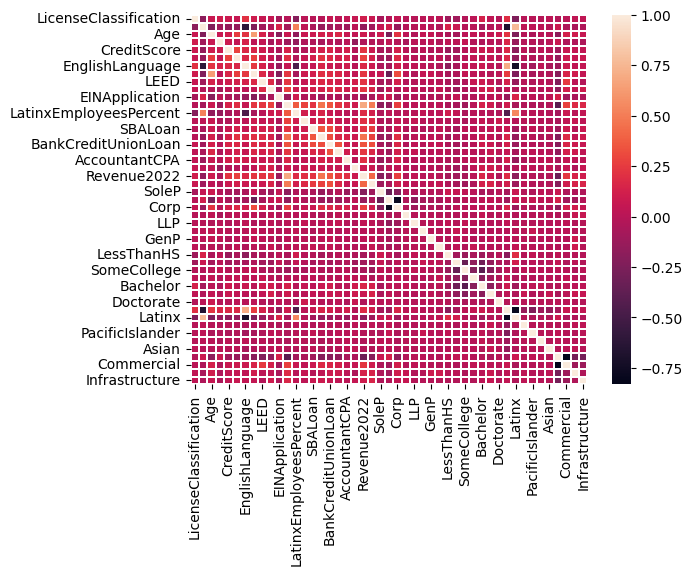

In [313]:
# correlation matrix

dataframe = pd.DataFrame(df_reg, columns = ['LicenseClassification', 'LatinxOwned', 'Age',
       'Gender', 'CreditScore', 'HomeOwner',
       'EnglishLanguage', 'YearsofExperience', 'LEED',
       'BusinessPlan', 'EINApplication', 'NumOfEmployees',
       'LatinxEmployeesPercent', 'WorkAccidents', 'SBALoan', 'PPPLoan',
       'BankCreditUnionLoan', 'LoanOfficerRelationship', 'AccountantCPA',
       '#ConsultingServices', 'Revenue2022', 'TotalOutstandingDebt',
       'SoleP', 'LLC', 'Corp', 'LP', 'LLP', 'LLLP',
       'GenP', 'BTrust', 'LessThanHS', 'HighSchool', 'SomeCollege', 'Associate', 'Bachelor',
       'Master', 'Doctorate', 'White', 'Latinx', 'Black', 'PacificIslander',
       'NativeAmerican', 'Asian', 'Residential', 'Commercial', 'Industrial',
       'Infrastructure'])

corr_matrix = dataframe.corr()
print("Correlation matrix is : ")

sns.heatmap(dataframe.corr(), linewidths=0.01)


print(corr_matrix)

# 0.5-0.99 is too correlated

# LatinxOwned vs EnglishLanguage = -0.615370 ---------Delete LatinxOwned
# LatinxOwned vs LatinxEmployeePercent = 0.515659 ----
# LatinxOwned vs White = -0.673012 -------------------
# LatinxOwned vs Latinx = 0.767868 -------------------

# Age vs YearsofExperience = 0.637580 ----------------Delete Age

# EnglishLanguage vs White = 0.700880 ----------------Delete White
# EnglishLanguage vs Latinx = -0.737484 -------------- 

# NumofEmployees vs Revenue = 0.692253 --------------- Delete Revenue

#LatinxEmployeePercent vs Latinx = 0.543295 ---------- Delete Latinx

# LLC vs Corp = -0.781801 ---------------------------- Delete LLC

# White vs Latinx = -0.789534 ------------------------ Both were previously deleted

#Residential vs Commercial = -0.831544 --------------- Delete Residential

In [314]:
# establish independent and dependent variables

# x equals all columns included 

# omitted in x for regression analysis because of string data types
# 'Revenue', 'EntityType',  'Education', 'ConstructionFocus', 'RaceAndEthnicity', 'TopFinancingSource', 'ConsultingServices'

# deleted highly correlated variables: 'LatinxOwned', 'Age', 'LLC', 'White', 'Latinx', 'Residential'

x = df_reg[['LicenseClassification',
       'Gender', 'CreditScore', 'HomeOwner',
       'EnglishLanguage', 'YearsofExperience', 'LEED',
       'BusinessPlan', 'EINApplication', 'NumOfEmployees',
       'LatinxEmployeesPercent', 'WorkAccidents', 'SBALoan', 'PPPLoan',
       'BankCreditUnionLoan', 'LoanOfficerRelationship', 'AccountantCPA',
       '#ConsultingServices', 'TotalOutstandingDebt',
       'SoleP','Corp', 'LP', 'LLP', 'LLLP',
       'GenP', 'BTrust', 'LessThanHS', 'HighSchool', 'SomeCollege', 'Associate', 'Bachelor',
       'Master', 'Doctorate', 'Black', 'PacificIslander',
       'NativeAmerican', 'Asian', 'Commercial', 'Industrial',
       'Infrastructure']]

# y equals revenue column
y = df_reg['Revenue2022']


In [315]:
# OLS preliminary regression on revenue
x2 = sm.add_constant(x)
est = sm.OLS(y,x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Revenue2022   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     63.64
Date:                Tue, 09 May 2023   Prob (F-statistic):          3.14e-313
Time:                        06:54:17   Log-Likelihood:                -14694.
No. Observations:                1974   AIC:                         2.947e+04
Df Residuals:                    1934   BIC:                         2.969e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

In [316]:
# deleted statistically insignificant: 'Gender', 'YearsofExperience',  'LEED', 'EINApplication',
# 'LatinxEmployeesPercent', 'WorkAccidents', 'SBALoan', '#ConsultingServices', 'LP', 'LLLP', 'GenP', 'BTrust',
# 'LessThanHS', 'HighSchool', 'SomeCollege', 'Associate', 'Master', 'Doctorate', 
# 'Black', 'PacificIslander', 'NativeAmerican', 'Asian', 
# 'Industrial', 'Infrastructure'

x = df_reg[['LicenseClassification', 'CreditScore', 'HomeOwner', 'EnglishLanguage',
       'BusinessPlan', 'NumOfEmployees', 'PPPLoan', 'BankCreditUnionLoan',
       'LoanOfficerRelationship', 'AccountantCPA', 'TotalOutstandingDebt',
       'SoleP', 'Corp', 'LLP', 'Bachelor', 'Commercial']]

y = df_reg['Revenue2022']


Correlation matrix is : 
                         LicenseClassification  CreditScore  HomeOwner  \
LicenseClassification                 1.000000     0.082850   0.057455   
CreditScore                           0.082850     1.000000   0.282835   
HomeOwner                             0.057455     0.282835   1.000000   
EnglishLanguage                       0.212095     0.165378   0.156640   
BusinessPlan                          0.053297     0.020339   0.061315   
NumOfEmployees                       -0.002269     0.137939   0.197349   
PPPLoan                              -0.006745     0.130051   0.217290   
BankCreditUnionLoan                   0.059171     0.150918   0.176648   
LoanOfficerRelationship               0.024281     0.072631   0.122098   
AccountantCPA                         0.036558     0.118431   0.139533   
TotalOutstandingDebt                  0.076039     0.084078   0.119945   
SoleP                                -0.069515    -0.071784  -0.082784   
Corp         

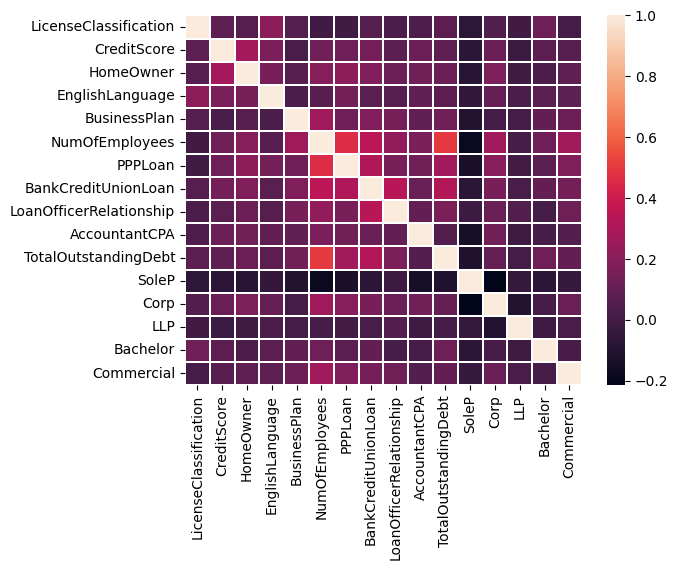

In [317]:
dataframe = pd.DataFrame(df_reg, columns = ['LicenseClassification', 'CreditScore', 'HomeOwner', 'EnglishLanguage',
       'BusinessPlan', 'NumOfEmployees', 'PPPLoan', 'BankCreditUnionLoan',
       'LoanOfficerRelationship', 'AccountantCPA', 'TotalOutstandingDebt',
       'SoleP', 'Corp', 'LLP', 'Bachelor', 'Commercial'])

corr_matrix = dataframe.corr()
print("Correlation matrix is : ")

sns.heatmap(dataframe.corr(), linewidths=0.01)


print(corr_matrix)


In [318]:
# Final OLS regression on revenue

x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Revenue2022   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     155.1
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        06:54:18   Log-Likelihood:                -14701.
No. Observations:                1974   AIC:                         2.944e+04
Df Residuals:                    1957   BIC:                         2.953e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

# Regression on Bank Loan Approval

In [319]:
# establish independent and dependent variables

# x equals all columns included 

# omitted in x for regression analysis because of string data types
# 'BankCreditUnionLoan', 'EntityType',  'Education', 'ConstructionFocus', 'RaceAndEthnicity', 'TopFinancingSource', 'ConsultingServices'

# deleted highly correlated variables: 'LatinxOwned', 'Age', 'NumOfEmployees', 'LLC', 'White', 'Latinx', 'Residential'  

x_credit = df_reg[['LicenseClassification', 
                   'Gender', 'CreditScore', 'HomeOwner',
                   'EnglishLanguage', 'YearsofExperience', 'LEED',
                   'BusinessPlan', 'EINApplication',
                   'LatinxEmployeesPercent', 'WorkAccidents', 'SBALoan', 'PPPLoan',
                   'LoanOfficerRelationship', 'AccountantCPA', 
                   '#ConsultingServices', 'Revenue2022', 'TotalOutstandingDebt', 
                   'SoleP','Corp', 'LP', 'LLP', 'LLLP', 
                   'GenP', 'BTrust', 'LessThanHS', 'HighSchool', 'SomeCollege', 'Associate', 'Bachelor', 
                   'Master', 'Doctorate', 'Black', 'PacificIslander', 
                   'NativeAmerican', 'Asian', 'Commercial', 'Industrial', 'Infrastructure']]

# predict loan approval for Bank or Credit Union Loan
y_credit = df_reg['BankCreditUnionLoan']

In [320]:
# Preliminary probit regression on Bank/Credit Union Loan Approval

xC = sm.add_constant(x_credit)
est_credit = sm.Probit(y_credit, xC)
est2_credit = est_credit.fit()
print(est2_credit.summary())


         Current function value: 0.490999
         Iterations: 35
                           Probit Regression Results                           
Dep. Variable:     BankCreditUnionLoan   No. Observations:                 1974
Model:                          Probit   Df Residuals:                     1935
Method:                            MLE   Df Model:                           38
Date:                 Tue, 09 May 2023   Pseudo R-squ.:                  0.2520
Time:                         06:54:18   Log-Likelihood:                -969.23
converged:                       False   LL-Null:                       -1295.7
Covariance Type:             nonrobust   LLR p-value:                4.871e-113
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.8630    1.6e+06  -1.79e-06      1.000   -3.14e+06    3.14e+06
LicenseClassificat

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [321]:
# deleted statistically insignificant: 
# 'LicenseClassification', 'Gender', 'EnglishLanguage', 'LEED','LatinxEmployeesPercent', '#ConsultingServices', 
# 'SoleP', 'LP', 'LLP', 'LLLP', 'GenP', 'BTrust', 
# 'LessThanHS', 'HighSchool', 'SomeCollege', 'Associate', 'Bachelor', 'Master', 'Doctorate', 
# 'Black', 'PacificIslander', 'NativeAmerican', 'Asian',
# 'Industrial', 'Infrastructure',

x_credit = df_reg[['CreditScore', 'HomeOwner',
                   'YearsofExperience',
                   'BusinessPlan', 'EINApplication',
                   'WorkAccidents', 'SBALoan', 'PPPLoan',
                   'LoanOfficerRelationship', 'AccountantCPA', 
                   'Revenue2022', 'TotalOutstandingDebt', 
                   'Corp','Commercial']]

# omitted in x for regression analysis
# 'BankCreditUnionLoan', 'EntityType',  'Education', 'ConstructionFocus', 'RaceAndEthnicity', 'TopFinancingSource', 'ConsultingServices'

# predict loan approval for Bank or Credit Union Loan
y_credit = df_reg['BankCreditUnionLoan']

Correlation matrix is : 
                         CreditScore  HomeOwner  YearsofExperience  \
CreditScore                 1.000000   0.282835           0.149232   
HomeOwner                   0.282835   1.000000           0.259914   
YearsofExperience           0.149232   0.259914           1.000000   
BusinessPlan                0.020339   0.061315           0.042786   
EINApplication             -0.046302  -0.086498          -0.218289   
WorkAccidents              -0.025167   0.056334           0.088051   
SBALoan                     0.070718   0.120607           0.116661   
PPPLoan                     0.130051   0.217290           0.203207   
LoanOfficerRelationship     0.072631   0.122098           0.160419   
AccountantCPA               0.118431   0.139533           0.096265   
Revenue2022                 0.215380   0.267388           0.230379   
TotalOutstandingDebt        0.084078   0.119945           0.049880   
Corp                        0.117921   0.173914           0.31322

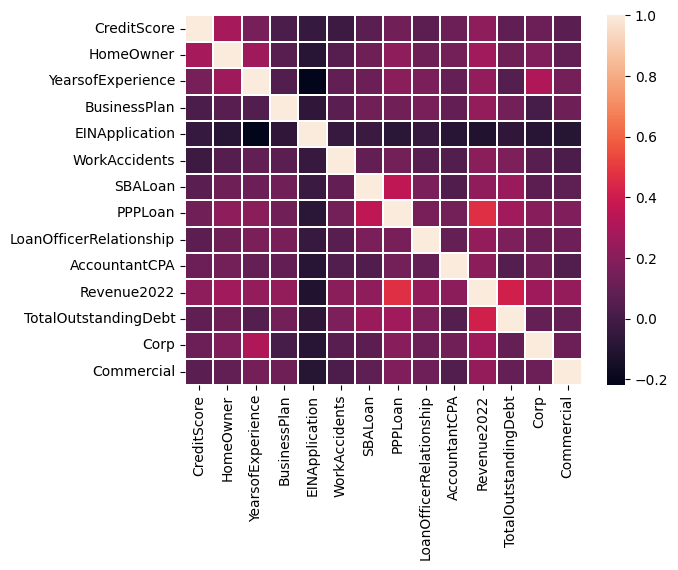

In [322]:
dataframe = pd.DataFrame(df_reg, columns = ['CreditScore', 'HomeOwner',
                                            'YearsofExperience', 
                                            'BusinessPlan', 'EINApplication', 
                                            'WorkAccidents', 'SBALoan', 'PPPLoan', 
                                            'LoanOfficerRelationship', 'AccountantCPA',
                                            'Revenue2022', 'TotalOutstandingDebt', 
                                            'Corp','Commercial'])

corr_matrix = dataframe.corr()
print("Correlation matrix is : ")

sns.heatmap(dataframe.corr(), linewidths=0.01)


print(corr_matrix)

In [323]:
# Final Probit regression on Bank/Credit Union Loan Approval

xC = sm.add_constant(x_credit)
est_credit = sm.Probit(y_credit, xC)
est2_credit = est_credit.fit()
print(est2_credit.summary())

Optimization terminated successfully.
         Current function value: 0.496924
         Iterations 6
                           Probit Regression Results                           
Dep. Variable:     BankCreditUnionLoan   No. Observations:                 1974
Model:                          Probit   Df Residuals:                     1959
Method:                            MLE   Df Model:                           14
Date:                 Tue, 09 May 2023   Pseudo R-squ.:                  0.2429
Time:                         06:54:19   Log-Likelihood:                -980.93
converged:                        True   LL-Null:                       -1295.7
Covariance Type:             nonrobust   LLR p-value:                2.749e-125
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.1837      0.322     -9.882      0.000      -

# Basic Tree Classification Model

Split dataset into 80% training data and 20% test data

In [404]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_reg[['LicenseClassification', 'Gender', 'CreditScore', 'HomeOwner', 'EnglishLanguage',
       'YearsofExperience', 'BusinessPlan', 'EINApplication', 'NumOfEmployees',
       'WorkAccidents', 'SBALoan', 'PPPLoan', 'LoanOfficerRelationship', 'AccountantCPA',
       'Revenue2022', 'TotalOutstandingDebt', 'SoleP', 'Corp', 'LLP',
       'Bachelor', 'Master', 'Latinx', 'Commercial', 'Industrial', 'Infrastructure']]
       
y = df_reg['BankCreditUnionLoan']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

In [405]:
full_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
full_tree = full_tree.fit(x_train,y_train)

# Use the tree to predict "leave"
y_predict = full_tree.predict(x_test)

In [406]:
full_tree_text = tree.export_text(full_tree)
print(full_tree_text)

|--- feature_14 <= 1062.50
|   |--- feature_12 <= 2.50
|   |   |--- feature_10 <= 0.50
|   |   |   |--- feature_5 <= 14.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  14.50
|   |   |   |   |--- class: 0
|   |   |--- feature_10 >  0.50
|   |   |   |--- feature_14 <= 400.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_14 >  400.00
|   |   |   |   |--- class: 0
|   |--- feature_12 >  2.50
|   |   |--- feature_10 <= 0.50
|   |   |   |--- feature_11 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_11 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_10 >  0.50
|   |   |   |--- feature_9 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_9 >  1.50
|   |   |   |   |--- class: 1
|--- feature_14 >  1062.50
|   |--- feature_10 <= 0.50
|   |   |--- feature_15 <= 1062.50
|   |   |   |--- feature_12 <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_12 >  2.50
|   |   |   |   |--- class: 0
|   |   |--- feature_15 >  1062.50
| 

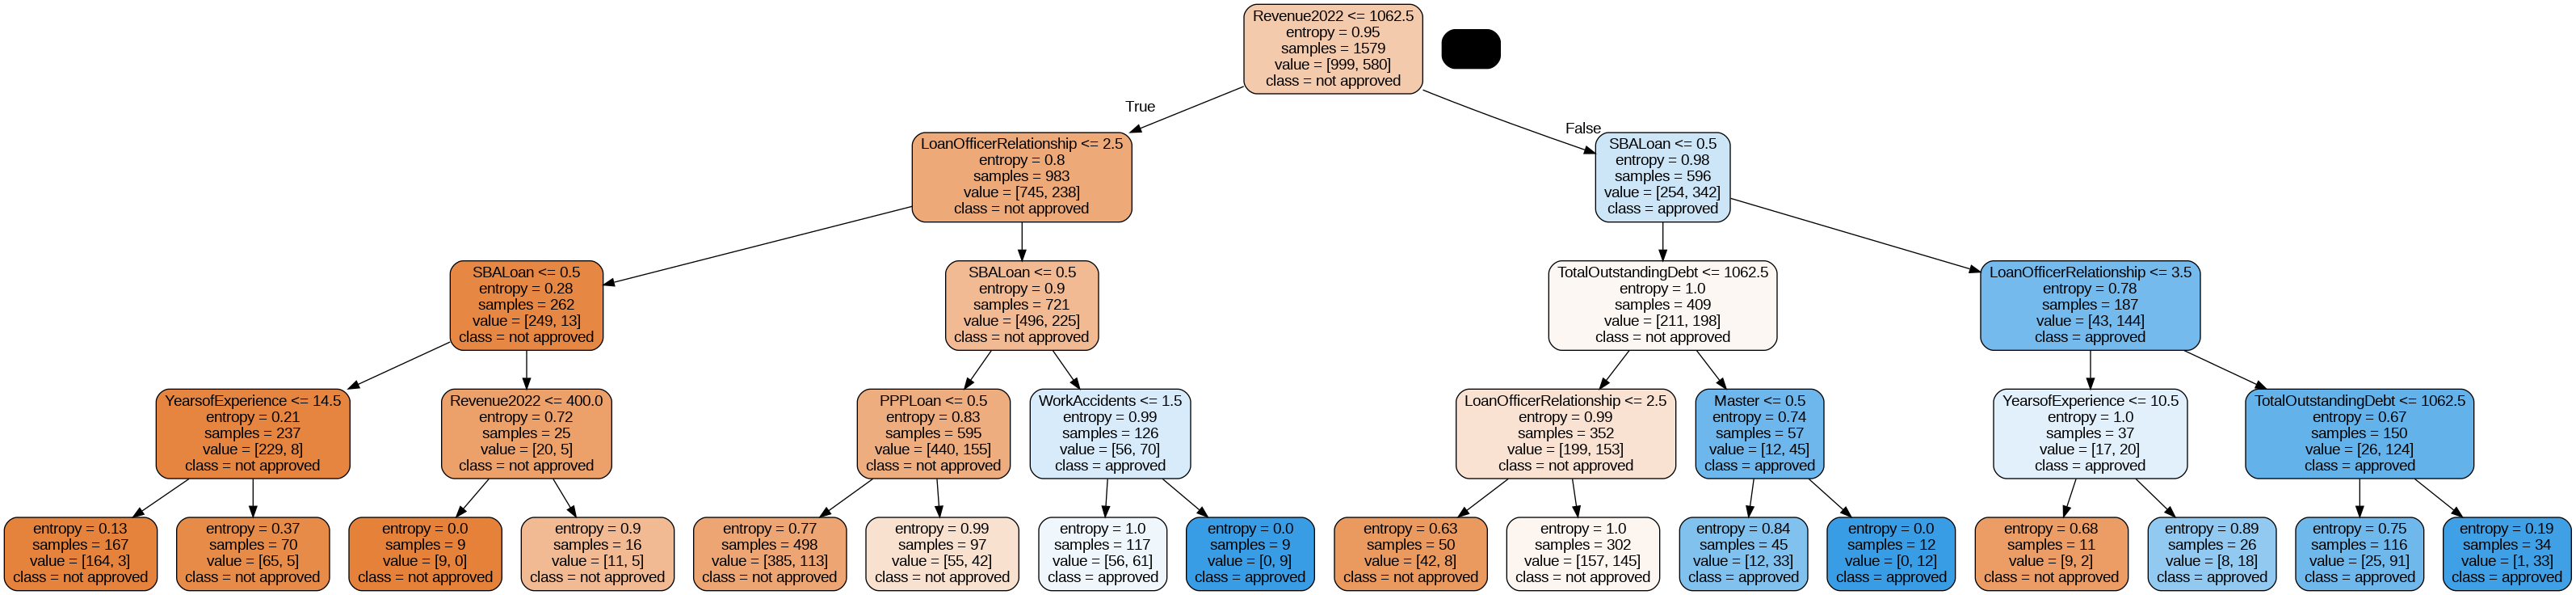

In [407]:
# display model

dot_data = StringIO()
export_graphviz(full_tree, out_file=dot_data, 
                   feature_names=x.columns,class_names=['not approved','approved'], 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [408]:
#check accuracy
dtAccuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy: %.2f%%" % (dtAccuracy * 100.0))

Accuracy: 72.91%


[[232  22]
 [ 85  56]]


[Text(0, 0.5, 'Not Approved'), Text(0, 1.5, 'Approved')]

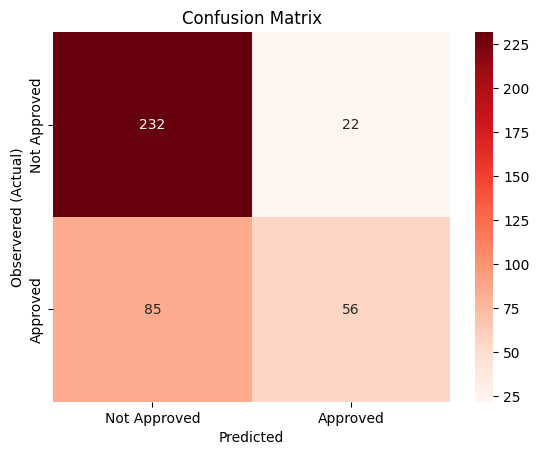

In [409]:
# create a confusion matrix
full_tree_matrix = confusion_matrix(y_test, y_predict)
print(full_tree_matrix)

#Create a heatmap from our confusion matrix
cm = sns.heatmap(full_tree_matrix, annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Not Approved','Approved'])
cm.yaxis.set_ticklabels(['Not Approved','Approved'])

# XGBoost Machine Learning Model

In [410]:
# fit model no training data
model = XGBClassifier(learning_rate=0.3, gamma=10, max_depth=4, tree_method='approx', enable_categorical=True)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=10, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [411]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [412]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.68%


<function matplotlib.pyplot.show(close=None, block=None)>

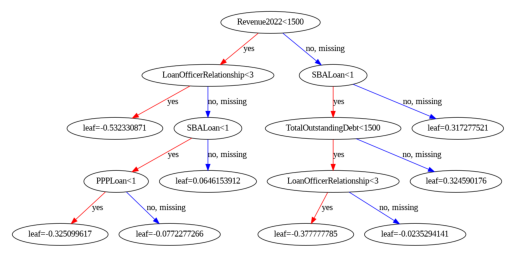

In [413]:
plot_tree(model)
plt.show